The current research code is developed based on the 
notion of existing Baseline Paper (Kamruleee51, 2020) (Hasan, Alam, Das and Hossain, 2020).



# References


Kamruleee51 (2020). Diabetes-Prediction-Using-ML-Classifiers/ML Models for
Diabetes Prediction.ipynb at master · kamruleee51/Diabetes-Prediction-Using-ML-Classifiers. 
[online] GitHub. Available at: https://github.com/kamruleee51/Diabetes-Prediction-Using-ML-Classifiers/blob/master/ML%20Models%20for%20Diabetes%20Prediction.ipynb [Accessed 7 Jan. 2022].




Hasan, Md.K., Alam, Md.A., Das, D., Hossain, E. and Hasan, M. (2020).
Diabetes Prediction Using Ensembling of Different Machine Learning Classifiers. IEEE Access, 8, pp.76516–76531.

### Loading of different packagaes and APIs

In [23]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# sns.set(style="whitegrid")
import warnings 
from sklearn.svm import SVC, NuSVC
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors  import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
from scipy import stats
from scipy.stats import uniform, randint
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold, StratifiedKFold, RepeatedStratifiedKFold
from sklearn.metrics import roc_curve, auc, accuracy_score
# from tflearn.data_utils import to_categorical
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report
from scipy import interp
from sklearn.metrics import confusion_matrix


### Utility Functions

In [24]:
Renamed_feature= []               #list of names that will rename to feature column
all_clf_res=[]                    #every classifier auc values are stored in it
random_initializer=100            #random initializer
n_dots=50
##########################################################

for i in range(16):
  #for renaming dataset of columns features F1 -- F16 
  Renamed_feature.append('F'+str(i+1)) 
############################################################

# Pairs plots are just showing all variables paired with all the other variables
def pair_plot(data):
  '''
  This function will create a grid of Axes such that each variable
  in data will by shared in the y-axis across a single row and in the x-axis
  across a single column.The diagonal Axes are treated differently, drawing 
  a plot to show the univariate distribution of the data for the variable in
  that column.
  Parameters :
  Input - data is the pandas type variable for 
  plotting pair plot of features in this
  dataframe 
  
  Output :
  This function Plot pairwise relationships in a dataset.
  '''
  plt.figure()
  
  pair_plot =sns.pairplot(data=data,            
                          height=3,
                          hue='Diabetic',  
                          diag_kind='kde')
  pair_plot.fig.suptitle("Pairplot of all features")
  plt.show()




###################################################################
# this function for Gaussian distribution plot 
# and box plot simultaneously in a figure
def Box_Gaussian(data):
  '''
  Parameters :
  Input - data is the pandas type variable

  Output - The Gaussian distribution plot for
  eight feature of input data 
  '''
  
  fig=plt.figure(figsize=(15,6))                                #define figure size
  fig.suptitle("Box Gaussian plot of all features")
  
  n_scaler = preprocessing.StandardScaler()                 #standardization function
  temp_Data = n_scaler.fit_transform(data)                  #pass into function for standrd.
  for i in range(16):                                        #loop for all 8 feature 
    
    plt.subplot(2, 4, i+1)                                  #subplot for 2 rows in 4 columns
    Data = temp_Data[:,i]                                   #data for every feature
    sns.kdeplot(Data, shade=True,color='red', alpha=0.3)    #kernel density function under red shaded arae
    ax = sns.boxplot(Data, saturation=0.9, color="green")   #boxplot  with green shaded area
                                                            # https://seaborn.pydata.org/generated/seaborn.kdeplot.html
                                                            # https://seaborn.pydata.org/generated/seaborn.boxplot.html
    plt.gca().invert_yaxis()                                #Reverse Y-Axis in PyPlot
    # plt.title('F'+str(i+1))
    frame1 = plt.gca()
    frame1.axes.xaxis.set_ticklabels([])                    #removing xlabel data 
    plt.ylim((-0.5,0.65))                                   #y axis  limit
    plt.tight_layout()                                      #This module provides routines to adjust subplot params so that subplots are nicely fit in the figure.
                                                            # https://matplotlib.org/api/tight_layout_api.html
    # plt.grid('on')
    
    for patch in ax.artists:
      r, g, b, a = patch.get_facecolor()                     #Get the facecolor of the Axes.
      patch.set_facecolor((r, g, b, 0.3))                    #set colour intensity
#############################################################


def plot_confusionMatrix(data):
  '''
  Parameters :
  Input - data is the pandas type variable

  Output -visualization of correalation matrix of
  input data 
  '''
  sns.set(font_scale=1.15)                                    # Set aesthetic parameters in one step.
  ax = plt.figure(figsize=(20, 20))                            #set figure size   https://seaborn.pydata.org/generated/seaborn.set.html
  plt.title("Confusion Matrix of all features")
  sns.heatmap(data.corr(),                                    # input correlation matrix  of dataset
              vmax=1.0,                                       #Values to anchor the colormap, otherwise they are inferred from
                                                              #the data and other keyword arguments.
              vmin=0.0,
              linewidths=0.01,
              square=False,                                   #If True, set the Axes aspect to “equal” so each cell will be square-shaped.
              annot=True,                                     #If True, write the data value in each cell. 
              linecolor="black")                              #Color of the lines that will divide each cell.            
                                                              #https://seaborn.pydata.org/generated/seaborn.heatmap.html
  b, t = plt.ylim()                                           # discover the values for bottom and top
  b += 0.5                                                    # Add 0.5 to the bottom
  t -= 0.5                                                    # Subtract 0.5 from the top
  plt.ylim(b, t)                                              # update the ylim(bottom, top) values
  plt.show() 



############################################################
# this function plot univariate distribution of 
# every feature

def dist_Plot(data):
  '''
  Parameters :
  Input - data is the pandas type variable

  Output - The distribution plot for
  eight feature of input data 
  '''
  fig, ax = plt.subplots(4,4, figsize=(15,15))                 #set numbers of rows and columns of subplot
  sns.set()
  sns.distplot(data.F1, bins = 10, ax=ax[0,0])                #Flexibly plot a univariate distribution of observations.
  sns.distplot(data.F2, bins = 10, ax=ax[0,1]) 
  sns.distplot(data.F3, bins = 10, ax=ax[0,2]) 
  sns.distplot(data.F4, bins = 10, ax=ax[0,3])
  sns.distplot(data.F5, bins = 10, ax=ax[1,0]) 
  sns.distplot(data.F6, bins = 10, ax=ax[1,1])
  sns.distplot(data.F7, bins = 10, ax=ax[1,2])                #Flexibly plot a univariate distribution of observations.
  sns.distplot(data.F8, bins = 10, ax=ax[1,3]) 
  sns.distplot(data.F9, bins = 10, ax=ax[2,0]) 
  sns.distplot(data.F10, bins = 10, ax=ax[2,1])
  sns.distplot(data.F11, bins = 10, ax=ax[2,2]) 
  sns.distplot(data.F12, bins = 10, ax=ax[2,3])
  sns.distplot(data.F13, bins = 10, ax=ax[3,0]) 
  sns.distplot(data.F14, bins = 10, ax=ax[3,1])
  sns.distplot(data.F15, bins = 10, ax=ax[3,2]) 
  sns.distplot(data.F16, bins = 10, ax=ax[3,3])

  fig.suptitle("Gaussian Distribution of all features")
  fig.tight_layout()                                          #This module provides routines to adjust subplot params
                                                              #  so that subplots are nicely fit in the figure.
                                                        

############################################################
# this function plot violin plot  of 
# every feature


def plot_violinplot (data):
  '''
  Parameters :
  Input - data is the pandas type variable

  Output - The violinplot plot for
  eight feature of input data 
  '''

  # A violin plot is a method of plotting numeric data.
  # It is similar to box plot with a rotated kernel 
  # density plot on each side. Violin plots are similar
  # to box plots, except that they also show the probability
  # density of the data at different values (in the simplest
  # case this could be a histogram).
  fig, ax = plt.subplots(4,4, figsize=(15,15))          
  # #set numbers of rows and columns of subplot and figure size 
  sns.set()
  sns.violinplot(x = data.Diabetic, y=data.F1,  ax=ax[0,0])    #violine plot for F1 feature
  sns.violinplot(x = data.Diabetic, y=data.F2,  ax=ax[0,1])    #violine plot for F2 feature 
  sns.violinplot(x = data.Diabetic, y=data.F3,  ax=ax[0,2])    #violine plot for F3 feature 
  sns.violinplot(x = data.Diabetic, y=data.F4,  ax=ax[0,3])    #violine plot for F4 feature
  sns.violinplot(x = data.Diabetic, y=data.F5,  ax=ax[1,0])    #violine plot for F5 feature 
  sns.violinplot(x = data.Diabetic, y=data.F6,  ax=ax[1,1])    #violine plot for F6 feature 
  sns.violinplot(x = data.Diabetic, y=data.F7,  ax=ax[1,2])    #violine plot for F1 feature
  sns.violinplot(x = data.Diabetic, y=data.F8,  ax=ax[1,3])    #violine plot for F2 feature 
  sns.violinplot(x = data.Diabetic, y=data.F9,  ax=ax[2,0])    #violine plot for F3 feature 
  sns.violinplot(x = data.Diabetic, y=data.F10,  ax=ax[2,1])    #violine plot for F4 feature
  sns.violinplot(x = data.Diabetic, y=data.F11,  ax=ax[2,2])    #violine plot for F5 feature 
  sns.violinplot(x = data.Diabetic, y=data.F12,  ax=ax[2,3])    #violine plot for F6 feature
  sns.violinplot(x = data.Diabetic, y=data.F13,  ax=ax[3,0])    #violine plot for F1 feature
  sns.violinplot(x = data.Diabetic, y=data.F14,  ax=ax[3,1])    #violine plot for F2 feature 
  sns.violinplot(x = data.Diabetic, y=data.F15,  ax=ax[3,2])    #violine plot for F3 feature 
  sns.violinplot(x = data.Diabetic, y=data.F16,  ax=ax[3,3])    #violine plot for F4 feature

  fig.suptitle("Violin plot of all features")
  fig.tight_layout()

                                                              # https://seaborn.pydata.org/generated/seaborn.violinplot.html

############################################################


#this function  is for manual outleir rejection
# def Manual (data):

#     '''
#     Parameters :
#     Input - data is the pandas type variable

#     Return - dataframe with outleir rejection
#     of input data 
#     '''
    # input dataset is data 
#     max_Age = data.F1.max()                         #maximum feature of F1
#     data = data[data.F1!=max_Age]                   #find  where extreme value is absent and remove extreme
#     max_Gender = data.F2.max()                             #maximum feature of F2  
#     data = data[data.F2!=max_Gender]                       #find  where extreme value is absent and remove
#     for i in range(4):                                      #in this loop we succesively remove 4 minimum element 
#       min_Gender = data.F2.min()                           #find minimum
#       data = data[data.F2!=min_Gender]                     #reject minimum
#     max_Family_Diabetes = data.F3.max()                       #maximum feature of F3
#     data = data[data.F3!=max_Family_Diabetes]                 #find  where extreme value is absent and remove
#     for i in range(2):                                      #in this loop we succesively remove 2 extreme element  
#       max_BMI = data.F4.max() 
#       data = data[data.F4!=max_BMI]
#     for i in range(25):                                     #in this loop we succesively remove 25 extreme element  
#       max_BPLevel = data.F5.max() 
#       data = data[data.F5!=max_BPLevel]
#     max_Pregancies = data.F6.Pregancies()
#     data = data[data.F6!=max_Pregancies]
#     for i in range(4):                                      #in this loop we succesively remove 4 minimum element  
#       min_bmi = data.F6.min() 
#       data = data[data.F6!=min_bmi]
#     for i in range(20):                                     #in this loop we succesively remove 20 extreme element 
#       max_DiabetesPedigreeF = data.F7.max()
#       data = data[data.F7!=max_DiabetesPedigreeF]
#     for i in range(20):                                     #in this loop we succesively remove 20 extreme element  
#       max_age = data.F8.max() 
#       data = data[data.F8!=max_age]
#       df =data
#     return data

############################################################

# this function if for outlair rejection with
# respect to mean value
def IQR_Mean (data):

  '''
  Parameters :
  Input - data is the pandas type variable

  Return - dataframe with outleir rejection
  filled with mean
  of input data 
  '''
  for i in range(16): 
    x = data[Renamed_feature[i]]
    Q1 = x.quantile(0.25)                                   # Q1 is the "middle" value in the first half of the rank-ordered data set.
    Q3 = x.quantile(0.75)                                   # Q3 is the "middle" value in the second half of the rank-ordered data set.
    IQR = Q3-Q1                                             # The interquartile range is equal to Q3 minus Q1.
    mean = x.mean()                                         #mean of feature 
    for j in range(569):                                    # loop for first 569 elements of feature
      temp = x[j]                                           # every feature value
      LW = (Q1 - 1.5 * IQR)                                 #lower considerable range of gaussian distribution
      UW = (Q3 + 1.5 * IQR)                                 #upper considerable range of gaussian distribution
      if temp < LW:                                         #replace upper value with mean
        x[j] = mean
      if temp > UW:                                         #replace lower value with mean
        x[j] = mean
    data[Renamed_feature[i]] = x
  return data

############################################################
# this function if for outlair rejection with
# respect to median value same as previous function
def IQR_Median (data): 
  '''
  Parameters :
  Input - data is the pandas type variable

  Return - dataframe with outleir rejection
  filled with median of input data 
  '''
  for i in range(16):
    x = data[Renamed_feature[i]]
    Q1 = x.quantile(0.25)
    Q3 = x.quantile(0.75)
    IQR = Q3-Q1
    median = x.quantile(0.5)                                # find the median
    for j in range(569):                                    #replace the first 569 values with respect to median
      temp = x[j]
      LW = (Q1 - 1.5 * IQR)
      UW = (Q3 + 1.5 * IQR)
      if temp < LW:                                         #replace upper value with median
        x[j] = median
      if temp > UW:
        x[j] = median                                       #replace upper value with median
    data[Renamed_feature[i]] = x
  return data

############################################################



# this function if for outlair rejection with
# 1.5 times of IQR that means that are
# significant in gaussian distribution
def IQR (data):

  '''
  Parameters :
  Input - data is the pandas type variable

  Return - dataframe with outleir rejection
  of input data 

  '''
  #input dataset as data
  for i in range(16):                                        # for every feature
    Q1 = data[Renamed_feature[i]].quantile(0.25)
    Q3 = data[Renamed_feature[i]].quantile(0.75)
    IQR = Q3-Q1                                             #find IQR
    LW = (Q1 - 1.5 * IQR)                                   #find lower boundary
          # print(LW)
    UW = (Q3 + 1.5 * IQR)                                   #find upper boundary
          # print(UW)
    data = data[data[Renamed_feature[i]]<UW]                #drop greater than upper limit
    data = data[data[Renamed_feature[i]]>LW]                #drop smaller than lower limit

  return data


############################################################
#outlier rejection with different condition

def outlier_Rejection (data, iqr_Mean, iqr_Medain, iqr, manual):
  '''
  Parameters :
  Input - 
  data is the pandas type variable
  iqr_Mean - for outleir rejection with Mean
  iqr_Medain- for outleir rejection with Medain
  iqr- for drop the outleir 
  manual -for manual rejection 
  Return - dataframe with outleir rejection
  filled with Input parameter

  '''
  
  # outlier_Rejection with conditional input
  if iqr_Mean == True:                                     #reject outleir with Mean
    data = IQR_Mean (data)
  if iqr_Medain == True:                                   #reject outleir with Median
    data = IQR_Medain (data)
  if iqr == True:                                          #reject outleir in IQR range
    data = IQR (data)
  if manual == True:                                       #reject outleir with manual
    data = Manual (data)

  return data

############################################################

#data plot on different input condition 
def data_plot (data,
               Pair_plot,
               Dist_Plot,
               Plot_violinplot,
               Plot_confusionMatrix,
               box_Gaussian):
  
  '''
  Parameters :
  Input - 
  data - It is the pandas type variable
  Pair_plot - for pair plot visualization of input  data  
  Dist_Plot- for gaussian distribution plot visualization of input  data  
  Plot_violinplot- for violin plot visualization of input  data  
  Plot_confusionMatrix -for confusion matrix visualization of input  data   
  
  Output - dataframe with outleir rejection
  filled with Input parameter

  '''
  if Pair_plot ==True:
    pair_plot(data)

  if Dist_Plot ==True:
    dist_Plot(data)

  if Plot_violinplot ==True:
    plot_violinplot (data)

  if Plot_confusionMatrix ==True:
    plot_confusionMatrix(data)

  if box_Gaussian ==True:
    Box_Gaussian(data)


############################################################


def replace_zero(data, field, target):
    
    mean_by_target = data.loc[data[field] != 0, [field, target]].groupby(target).mean()
    data.loc[(data[field] == 0)&(data[target] == 0), field] = mean_by_target.iloc[0][0]
    data.loc[(data[field] == 0)&(data[target] == 1), field] = mean_by_target.iloc[1][0]


############################################################


def metrics (y_true, y_pred, probas_):


  '''
  Parameters :
  Input - 
  y_true - true  value of input data    
  y_pred- predicted  value of input data  
  probas_- probability/confidence of predicted output

  return -True Negative(tn),False Positive(fp),False Negative(fn)
  True positive(tp),AUC(roc_auc),False Positive Rate(fpr),
  True positive rate(tpr)

  '''


  points=n_dots*'-'
  print(points)
#    print("Best parameters set found on development set:")
#    print(clf.best_params_)
  fpr, tpr, thresholds = roc_curve(y_true, probas_[:, 1])
  tprs.append(interp(mean_fpr, fpr, tpr))
  tprs[-1][0] = 0.0
  roc_auc = auc(fpr, tpr)
  #  aucs.append(roc_auc)
  print("Detailed classification report for current fold:")
  print()
  print(classification_report(y_true, y_pred))
  print()
  print("Area Under ROC (AUC): {}".format(roc_auc))
  print()
  print('Confusion Matrix for current fold: ')
  print(confusion_matrix(y_true, y_pred))
  print()
  print("Accuracy for Current Fold: {}".format(accuracy_score(y_true, y_pred)))
  print()
  tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

  return  tn, fp, fn, tp, roc_auc, fpr, tpr

############################################################


def average_ROC(mean_fpr,tprs,aucs,TP,TN,FP,FN):

  '''
  Parameters :
  mean_fpr - Mean False positive rate
  tprs -values of true positive rate
  aucs  - values of auc
  TP    - True positive 
  TN    - True Negative
  FP    - False Positiv
  FN    - False Negative

  Output - 
  Visalization of TPR vs FPR plot
  '''
  sen = (np.sum(TP))/(np.sum(TP)+np.sum(FN))
  spe = (np.sum(TN))/(np.sum(TN)+np.sum(FP))

  mean_tpr = np.mean(tprs, axis=0)
  mean_tpr[-1] = 1.0
  # mean_auc = auc(mean_fpr, mean_tpr)
  mean_auc = np.mean(aucs)
  std_auc = np.std(aucs)
  # plt.figure(figsize=(8, 5))
  # plt.grid(True)
  ax = plt.axes()
  ax.grid(color='lightgray', linestyle='-', linewidth=.5)
  # Setting the background color
  ax.set_facecolor("white")
  
  ax.spines['bottom'].set_color('#000000')
  ax.spines['top'].set_color('#000000') 
  ax.spines['right'].set_color('#000000')
  ax.spines['left'].set_color('#000000')

  plt.plot(mean_fpr, mean_tpr, color='blue',
          label=r'Avg. ROC (AUC (avg $\pm$ std) = %0.3f $\pm$ %0.3f)' % (mean_auc, std_auc),
          lw=2, alpha=.8)
  
  plt.scatter((1-spe), sen, s=80, c='r', marker='x',)
  plt.scatter(0, sen, s=80, c='r', marker='x',)
  plt.scatter((1-spe),0, s=80, c='r', marker='x',)
  plt.axhline(y=sen, color='r', linestyle='--')
  plt.axvline(x=(1-spe), color='r', linestyle='--')
  plt.text((1-spe), 0.02, "FPR={:0.3f}".format((1-spe)))
  plt.text(0.009, sen+0.05, "TPR={:0.3f}".format(sen))

  std_tpr = np.std(tprs, axis=0)
  tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
  tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
  plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='darkgray', alpha=0.5,
                  label=r'$\pm$ 1 Standard deviation')

  plt.xticks(np.arange(0.0, 1.01, step=0.1))
  plt.yticks(np.arange(0.0, 1.01, step=0.1))
  left=0.0
  right=1.0
  plt.xlim(left, right)
  plt.ylim(left, right)
  plt.xlabel('False Positive Rate (FPR)')
  plt.ylabel('True Positive Rate (TPR)')
  plt.legend(loc="lower right")
  # plt.grid(True)
  plt.show()
   
############################################################

def plot_Current_ROC(fpr,tpr,iterator,roc_auc):
  
  '''
  Parameters :
  Input - 
  fpr - False positive rate
  tpr - True positive rate
  roc_auc -auc values of roc curve

  Output - 
  Visalization of current roc curve

  '''
  plt.plot(fpr,
          
          tpr,
          # Color[iterator],
          alpha=0.35,
          # label='macro-average ROC (AUC = {0:0.3f})'.format(roc_auc)
          # +FOLD[iterator],
          linewidth=1)
   
############################################################

   
def creat_Model (classifier, X_Train, Y_Train, tuned_parameters, verbose):

  '''
  Parameters :
  Input - 
  X_Train -train data 
  Y_Train - label/output of train data
  tuned_parameters =parameters of models
  verbose = condition about model

  Output - 
  Returned a tuned classifier using grid search
  '''
  clf = GridSearchCV(classifier,
                    tuned_parameters,
                    verbose=verbose,
                    cv=5,
                    scoring='roc_auc',
                    n_jobs=-1)
  clf.fit(X_Train, Y_Train)
  return clf
############################################################

def average_performance(aucs,Accuracy,TP,TN,FP,FN): 

  '''
  Parameters :
  Input - 
  aucs= values of aucs
  Accuracy - value of accuracy
  TP  - True Positive
  TN  - True Negative
  FP  - False Positive
  FN  - False Negative


  Output - 
  It prints the average aucs,accuarcy,confusion matrix
  '''

  print()
  n_dotsav=(n_dots-len('Average'))//2
    
  print('-'*n_dotsav+'Average'+'-'*n_dotsav)
  print("AUC (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(aucs),np.std(aucs)))
  print("Accuracy (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(Accuracy),np.std(Accuracy)))
  cm = [[int(np.mean(TP)), int(np.mean(FP))],[int(np.mean(FN)), int(np.mean(TN))]]
  print ('Avg. CM is '+str(cm))
  cm = [[int(np.sum(TP)), int(np.sum(FP))],[int(np.sum(FN)), int(np.sum(TN))]]
  print ('Total for all folds CM is '+str(cm))
  re_auc=str(round(np.mean(aucs), 3))+'+/-'+str(round(np.std(aucs),3))
  all_clf_res.append(re_auc)
    
############################################################

#this  function is for algorithm based feature selection 
def feature_Selector(data, algo, n_feature):
    '''
    Parameters :
    Input - 
    data - It is the pandas type variable
    algo - type of algorith PCA,ICA,Correlation


    Output - 
    It prints the average aucs,accuarcy,confusion matrix
    '''
    if algo=='PCA':                                                   #for pca algorithm
        X_Data= data.iloc[:,:6].values
        pca = PCA(n_components=n_feature)                             #number of feature
        X_Data = pca.fit_transform(X_Data)
        return X_Data , data.iloc[:,6:].values

    if algo == 'ICA':
        X_Data= data.iloc[:,:6].values
        ICA = FastICA(n_components=n_feature, random_state=12) 
        X_Data = ICA.fit_transform(X_Data)
        return X_Data , data.iloc[:,6:].values
    
    if algo =='corr':                                                   #for ica algorithm
        if n_feature ==4:
            data = data[['F2','F5','F4','F6','Diabetic']]                #for 4 feature
            return data.iloc[:,:4].values, data.iloc[:,4:].values
        if n_feature ==6:
            data = data[['F11','F15','F14','F4','F1','F3','Diabetic']]       #for 6 feature
            return data.iloc[:,:6].values, data.iloc[:,6:].values
        if n_feature ==9:
            data = data[['F11','F15','F4','F14','F1','F3','F6','F13','F16','Diabetic']]       #for 9 feature
            return data.iloc[:,:9].values, data.iloc[:,9:].values
        
        if n_feature ==12:
            data = data[['F11','F15','F4','F14','F1','F3','F6','F13','F16','F5','F8','Diabetic']]       #for 12 feature
            return data.iloc[:,:12].values, data.iloc[:,12:].values
        
    if algo == 'None':
        return data.iloc[:,:6].values, data.iloc[:,6:].values            #if feature selection is off all features are counted

### Read the data from the local using pandas (Python Data Analysis Library)

In [25]:
from google.colab import files
uploaded = files.upload()

ModuleNotFoundError: No module named 'google'

In [26]:
import pandas as pd
data = pd.read_csv(r"C:\Users\chaki\OneDrive\Documents\dissertation\Coding\Diabetes2019.csv")
data.head()

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic
0,50-59,Male,no,yes,one hr or more,39.0,no,no,8,6,no,occasionally,sometimes,high,0.0,0,not much,no
1,50-59,Male,no,yes,less than half an hr,28.0,no,no,8,6,yes,very often,sometimes,normal,0.0,0,not much,no
2,40-49,Male,no,no,one hr or more,24.0,no,no,6,6,no,occasionally,sometimes,normal,0.0,0,not much,no
3,50-59,Male,no,no,one hr or more,23.0,no,no,8,6,no,occasionally,sometimes,normal,0.0,0,not much,no
4,40-49,Male,no,no,less than half an hr,27.0,no,no,8,8,no,occasionally,sometimes,normal,0.0,0,not much,no


In [27]:
import io
data = pd.read_csv(io.BytesIO(uploaded['diabetes2019.csv']))
data.shape

NameError: name 'uploaded' is not defined

In [28]:
data.head()

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic
0,50-59,Male,no,yes,one hr or more,39.0,no,no,8,6,no,occasionally,sometimes,high,0.0,0,not much,no
1,50-59,Male,no,yes,less than half an hr,28.0,no,no,8,6,yes,very often,sometimes,normal,0.0,0,not much,no
2,40-49,Male,no,no,one hr or more,24.0,no,no,6,6,no,occasionally,sometimes,normal,0.0,0,not much,no
3,50-59,Male,no,no,one hr or more,23.0,no,no,8,6,no,occasionally,sometimes,normal,0.0,0,not much,no
4,40-49,Male,no,no,less than half an hr,27.0,no,no,8,8,no,occasionally,sometimes,normal,0.0,0,not much,no


In [29]:
#Dropping column since it is unwanted feature.
data = data.drop(["Pdiabetes"], axis=1)
data.head()

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,UriationFreq,Diabetic
0,50-59,Male,no,yes,one hr or more,39.0,no,no,8,6,no,occasionally,sometimes,high,0.0,not much,no
1,50-59,Male,no,yes,less than half an hr,28.0,no,no,8,6,yes,very often,sometimes,normal,0.0,not much,no
2,40-49,Male,no,no,one hr or more,24.0,no,no,6,6,no,occasionally,sometimes,normal,0.0,not much,no
3,50-59,Male,no,no,one hr or more,23.0,no,no,8,6,no,occasionally,sometimes,normal,0.0,not much,no
4,40-49,Male,no,no,less than half an hr,27.0,no,no,8,8,no,occasionally,sometimes,normal,0.0,not much,no


In [30]:
#To Drop a value in specified row or column
data.drop(data.index[data['RegularMedicine'] == 'o'], inplace = True) 


In [31]:
#Replacing duplicate values with original values
data['Diabetic'] = data['Diabetic'].replace(to_replace =" no", value ="no")
data['BPLevel'] = data['BPLevel'].replace(to_replace ="normal ", value ="normal")
data['BPLevel'] = data['BPLevel'].replace(to_replace ="High", value ="high")
data['BPLevel'] = data['BPLevel'].replace(to_replace ="Low", value ="low")


In [32]:
print(data.isnull().sum())

Age                  0
Gender               0
Family_Diabetes      0
highBP               0
PhysicallyActive     0
BMI                  4
Smoking              0
Alcohol              0
Sleep                0
SoundSleep           0
RegularMedicine      0
JunkFood             0
Stress               0
BPLevel              0
Pregancies          42
UriationFreq         0
Diabetic             1
dtype: int64


(array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45.]),
 <a list of 10 Text major ticklabel objects>)

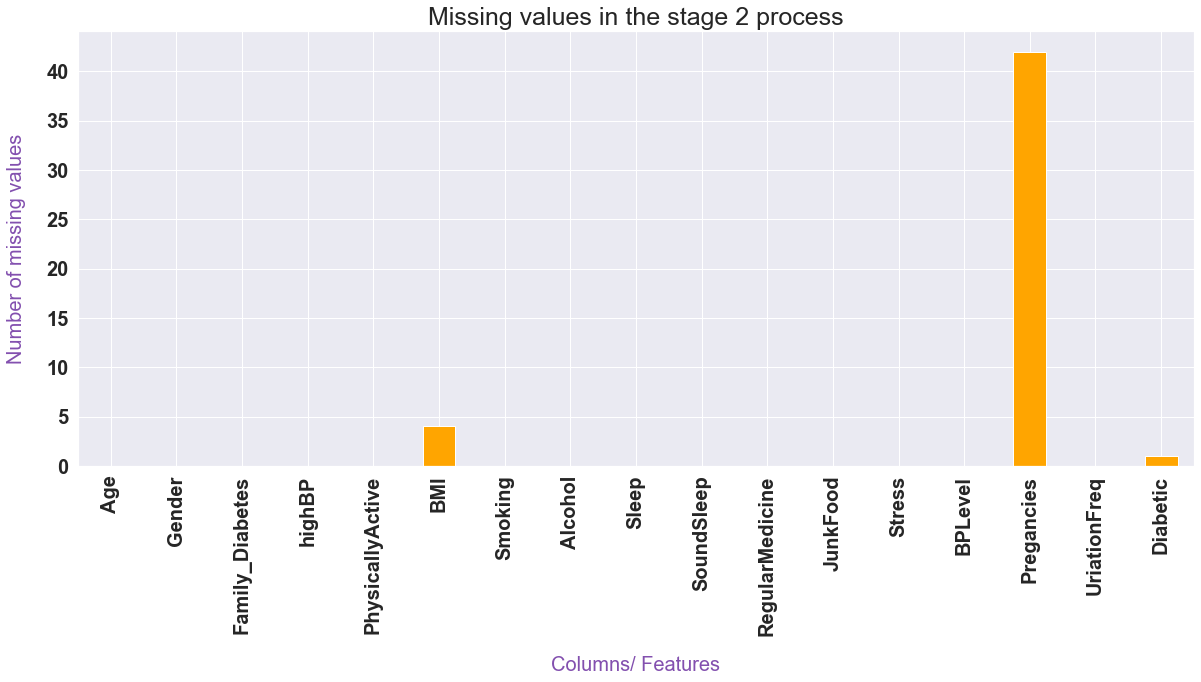

In [33]:
# Title as Missing Values in the Stage 2 Methodology
plt.title('Missing values in the stage 2 process', fontsize=25)
# Putting Features in x label
plt.xlabel('Columns/ Features', color='#8350af', labelpad=20, fontsize=20) 
# Putting Missing values in x label
plt.ylabel('Number of missing values', color='#8350af', labelpad=20, fontsize=20)
plt.rcParams['axes.axisbelow'] = True
data.isnull().sum().plot(figsize=(20, 8), color='orange', rot=60,kind ='bar')
plt.xticks(fontsize=20, rotation=90,weight = 'bold')
plt.yticks(fontsize=20, weight = 'bold')

In [34]:

# Null values Imputation

data["Pregancies"] = np.where(data["Pregancies"].isnull(),data["Pregancies"].median(),data["Pregancies"])
data["BMI"] = np.where(data["BMI"].isnull(),data["BMI"].median(),data["BMI"])
data["Diabetic"] = np.where(data["Diabetic"].isnull(),data["Diabetic"].mode(),data["Diabetic"])

print(data.isnull().sum())

Age                 0
Gender              0
Family_Diabetes     0
highBP              0
PhysicallyActive    0
BMI                 0
Smoking             0
Alcohol             0
Sleep               0
SoundSleep          0
RegularMedicine     0
JunkFood            0
Stress              0
BPLevel             0
Pregancies          0
UriationFreq        0
Diabetic            0
dtype: int64


In [35]:
print(data["Age"].value_counts())    # count of No. of uniques values
print(data["Gender"].value_counts())
print(data["Family_Diabetes"].value_counts())
print(data["highBP"].value_counts())
print(data["PhysicallyActive"].value_counts())
#print(data["BMI"].value_counts())
print(data["Smoking"].value_counts())
print(data["Alcohol"].value_counts())
#print(data["Sleep"].value_counts())
#print(data["SoundSleep"].value_counts())
print(data["RegularMedicine"].value_counts())
print(data["JunkFood"].value_counts())
print(data["Stress"].value_counts())
print(data["BPLevel"].value_counts())
#print(data["Pregancies"].value_counts())
#print(data["Pdata"].value_counts())
print(data["UriationFreq"].value_counts())
print(data["Diabetic"].value_counts())

less than 40    487
40-49           164
50-59           156
60 or older     144
Name: Age, dtype: int64
Male      579
Female    372
Name: Gender, dtype: int64
no     497
yes    454
Name: Family_Diabetes, dtype: int64
no     723
yes    228
Name: highBP, dtype: int64
less than half an hr    336
more than half an hr    271
one hr or more          212
none                    132
Name: PhysicallyActive, dtype: int64
no     843
yes    108
Name: Smoking, dtype: int64
no     759
yes    192
Name: Alcohol, dtype: int64
no     615
yes    336
Name: RegularMedicine, dtype: int64
occasionally    671
often           184
very often       52
always           44
Name: JunkFood, dtype: int64
sometimes     563
very often    164
not at all    136
always         88
Name: Stress, dtype: int64
normal    707
high      216
low        28
Name: BPLevel, dtype: int64
not much       663
quite often    288
Name: UriationFreq, dtype: int64
no     685
yes    266
Name: Diabetic, dtype: int64


In [36]:

#Label Encoding
from sklearn.preprocessing import LabelEncoder

data["Age"] = LabelEncoder().fit_transform(data["Age"])
data["Gender"] = LabelEncoder().fit_transform(data["Gender"])
data["Family_Diabetes"] = LabelEncoder().fit_transform(data["Family_Diabetes"])
data["highBP"] = LabelEncoder().fit_transform(data["highBP"])
data["PhysicallyActive"] = LabelEncoder().fit_transform(data["PhysicallyActive"])
data["Smoking"] = LabelEncoder().fit_transform(data["Smoking"])
data["Alcohol"] = LabelEncoder().fit_transform(data["Alcohol"])
data["RegularMedicine"] = LabelEncoder().fit_transform(data["RegularMedicine"])
data["JunkFood"] = LabelEncoder().fit_transform(data["JunkFood"])
data["Stress"] = LabelEncoder().fit_transform(data["Stress"])
data["BPLevel"] = LabelEncoder().fit_transform(data["BPLevel"])
data["UriationFreq"] = LabelEncoder().fit_transform(data["UriationFreq"])
data["Diabetic"] = LabelEncoder().fit_transform(data["Diabetic"])


In [37]:
data.head()

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,UriationFreq,Diabetic
0,1,1,0,1,3,39.0,0,0,8,6,0,1,2,0,0.0,0,0
1,1,1,0,1,0,28.0,0,0,8,6,1,3,2,2,0.0,0,0
2,0,1,0,0,3,24.0,0,0,6,6,0,1,2,2,0.0,0,0
3,1,1,0,0,3,23.0,0,0,8,6,0,1,2,2,0.0,0,0
4,0,1,0,0,0,27.0,0,0,8,8,0,1,2,2,0.0,0,0


### Renaming the Features by F1, F2, and so on ......





In [38]:
data = pd.DataFrame({'F1':data.iloc[:,:16].values[:,0],
                     'F2':data.iloc[:,:16].values[:,1],
                     'F3':data.iloc[:,:16].values[:,2],
                     'F4':data.iloc[:,:16].values[:,3],
                     'F5':data.iloc[:,:16].values[:,4],
                     'F6':data.iloc[:,:16].values[:,5],
                     'F7':data.iloc[:,:16].values[:,6],
                     'F8':data.iloc[:,:16].values[:,7],
                     'F9':data.iloc[:,:16].values[:,8],
                     'F10':data.iloc[:,:16].values[:,9],
                     'F11':data.iloc[:,:16].values[:,10],
                     'F12':data.iloc[:,:16].values[:,11],
                     'F13':data.iloc[:,:16].values[:,12],
                     'F14':data.iloc[:,:16].values[:,13],
                     'F15':data.iloc[:,:16].values[:,14],
                     'F16':data.iloc[:,:16].values[:,15],
                     'Diabetic':data.iloc[:,16:].values[:,0]})

In [39]:
data.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Diabetic
0,1.0,1.0,0.0,1.0,3.0,39.0,0.0,0.0,8.0,6.0,0.0,1.0,2.0,0.0,0.0,0.0,0
1,1.0,1.0,0.0,1.0,0.0,28.0,0.0,0.0,8.0,6.0,1.0,3.0,2.0,2.0,0.0,0.0,0
2,0.0,1.0,0.0,0.0,3.0,24.0,0.0,0.0,6.0,6.0,0.0,1.0,2.0,2.0,0.0,0.0,0
3,1.0,1.0,0.0,0.0,3.0,23.0,0.0,0.0,8.0,6.0,0.0,1.0,2.0,2.0,0.0,0.0,0
4,0.0,1.0,0.0,0.0,0.0,27.0,0.0,0.0,8.0,8.0,0.0,1.0,2.0,2.0,0.0,0.0,0


### Show the statistical description of the data which sumarize the central tendency, dispersion, and shape of a data distribution.



In [40]:
data.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Diabetic
count,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000
mean,2.003155,0.608833,0.477392,0.239748,1.231335,25.766562,0.113565,0.201893,6.948475,5.493165,0.353312,1.256572,1.844374,1.516299,0.370137,0.302839,0.279706
std,1.169341,0.488268,0.499751,0.427154,1.153989,5.391043,0.317449,0.401624,1.273402,1.864828,0.478250,0.626936,0.813677,0.839484,0.893080,0.459728,0.449091
min,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.000000,0.000000,6.000000,4.000000,0.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,3.000000,1.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,7.000000,6.000000,0.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000
75%,3.000000,1.000000,1.000000,0.000000,2.000000,29.000000,0.000000,0.000000,8.000000,7.000000,1.000000,1.000000,2.000000,2.000000,0.000000,1.000000,1.000000
max,3.000000,1.000000,1.000000,1.000000,3.000000,45.000000,1.000000,1.000000,11.000000,11.000000,1.000000,3.000000,3.000000,2.000000,4.000000,1.000000,1.000000


# Raw Data Plot and Presenation
**Plot pairwise relationships in a dataset:**
* The diagonal shows the distribution of the dataset with the kernel density plots of both the classes.

* The scatter-plots shows the relation between each and every attribute or features taken pairwise where the scatter-plots shows that no attributes are able to clearly distinguish the two outcome. 

**Distribution Plot:**

Dist Plot helps us to flexibly plot a univariate distribution of observations.

**Violin Plots:** 
A violin plot is a method of plotting numeric data. It is similar to box plot with a rotated kernel density plot on each side. Violin plots are similar to box plots, except that they also show the probability density of the data at different values (in the simplest case this could be a histogram). 

**Correlation:** 
A correlation could be positive, meaning both variables move in the same direction, or negative, meaning that when one variable’s value increases, the other variables’ values decrease. Correlation can also be neural or zero, meaning that the variables are unrelated.

<Figure size 432x288 with 0 Axes>

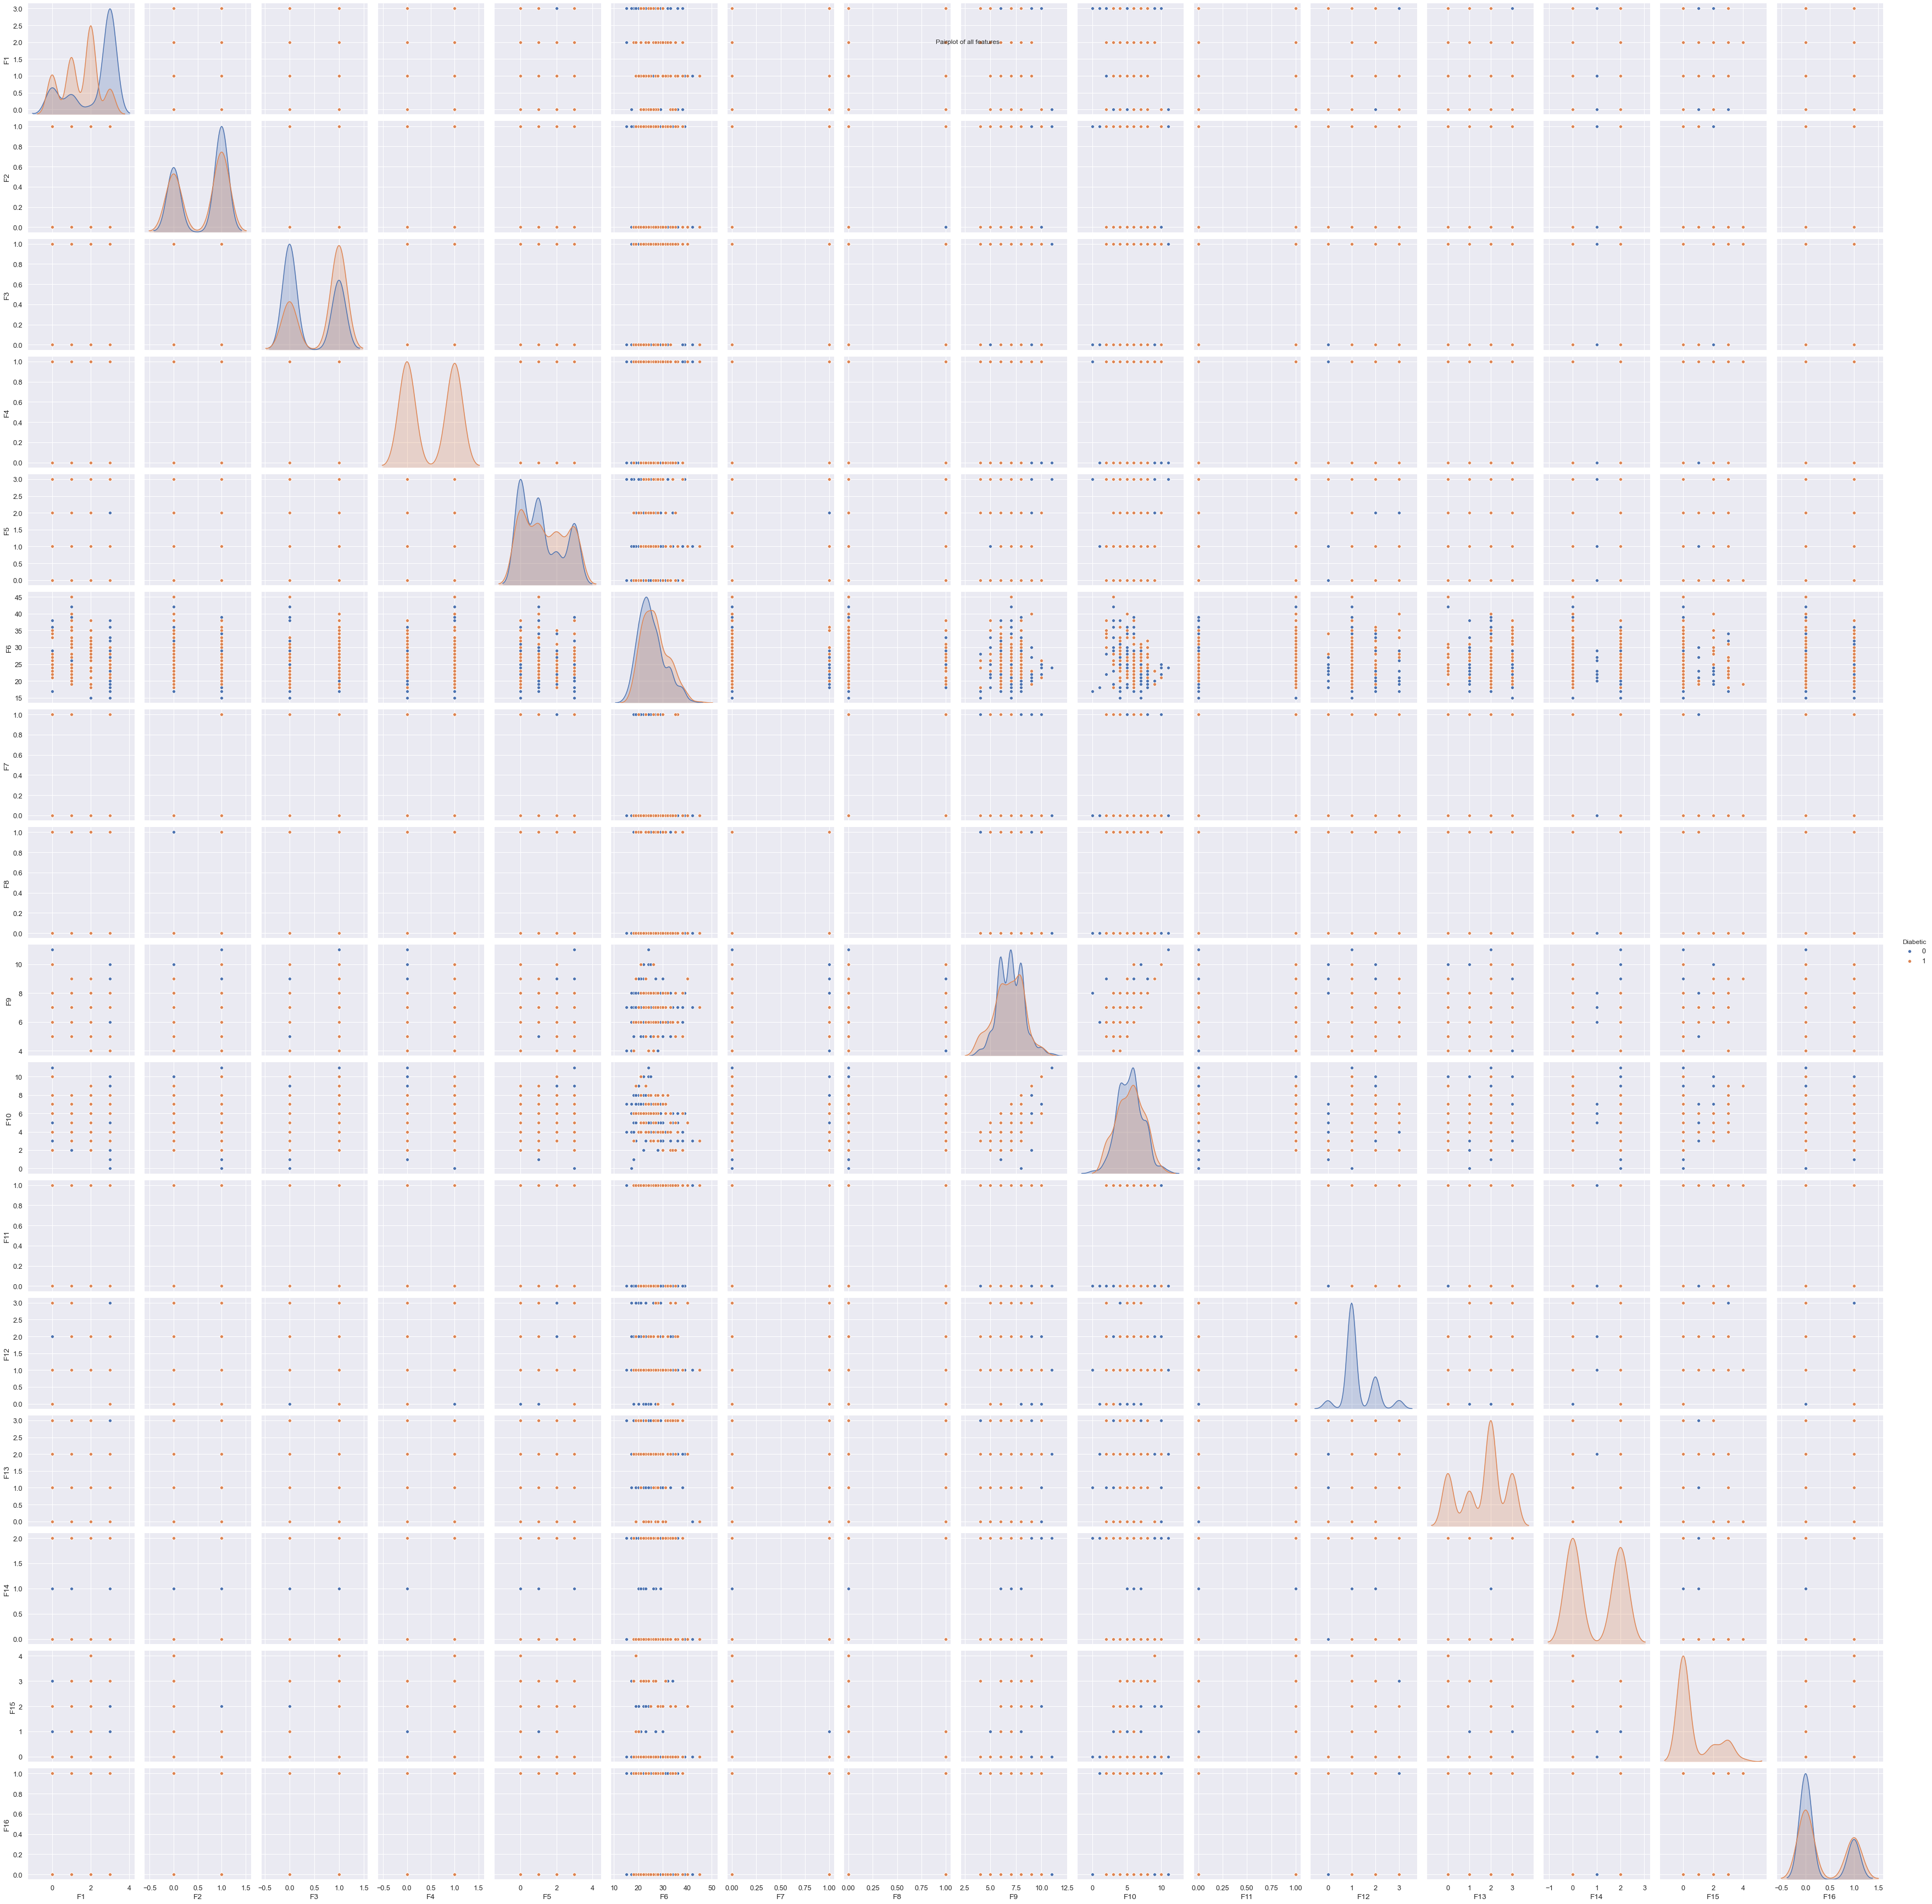

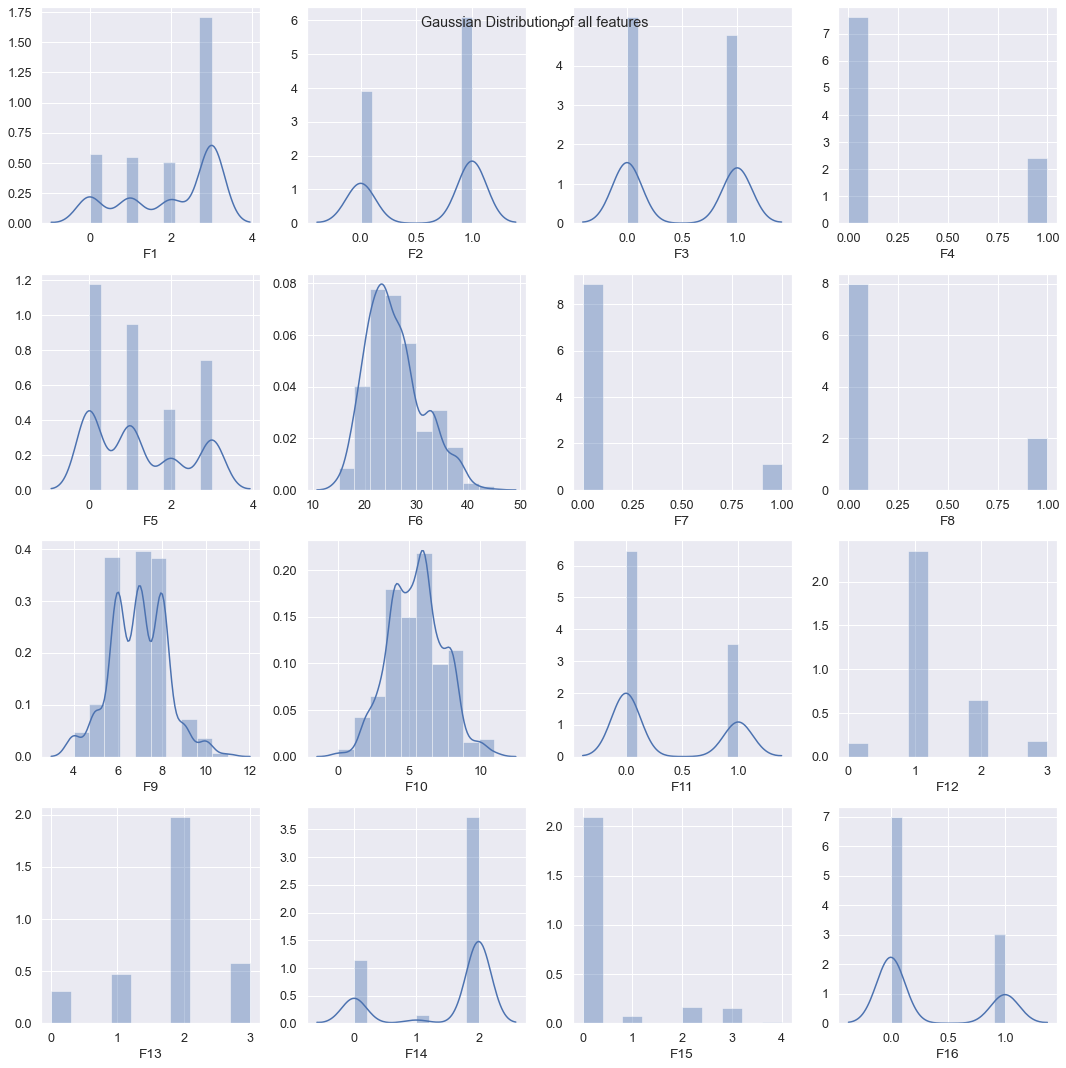

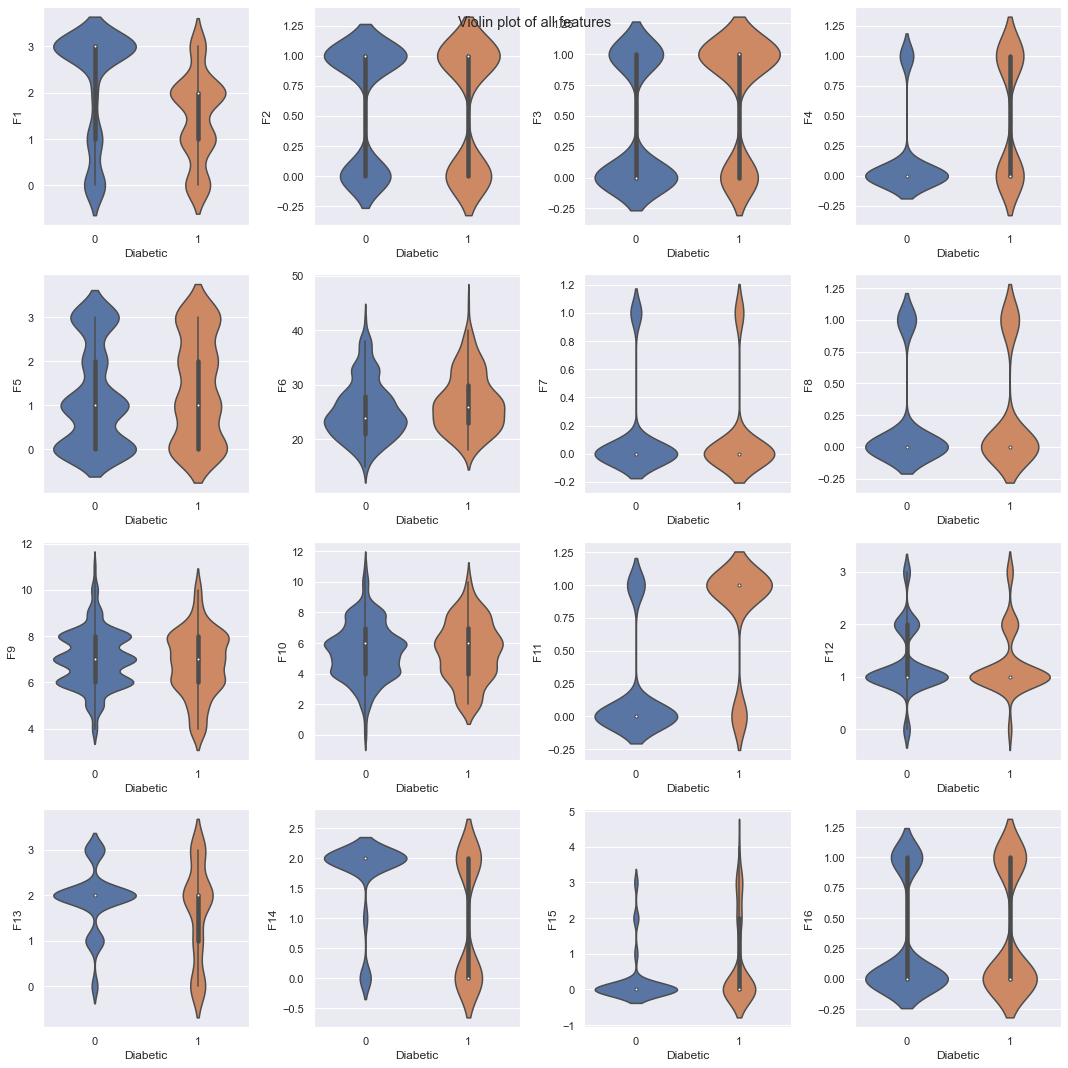

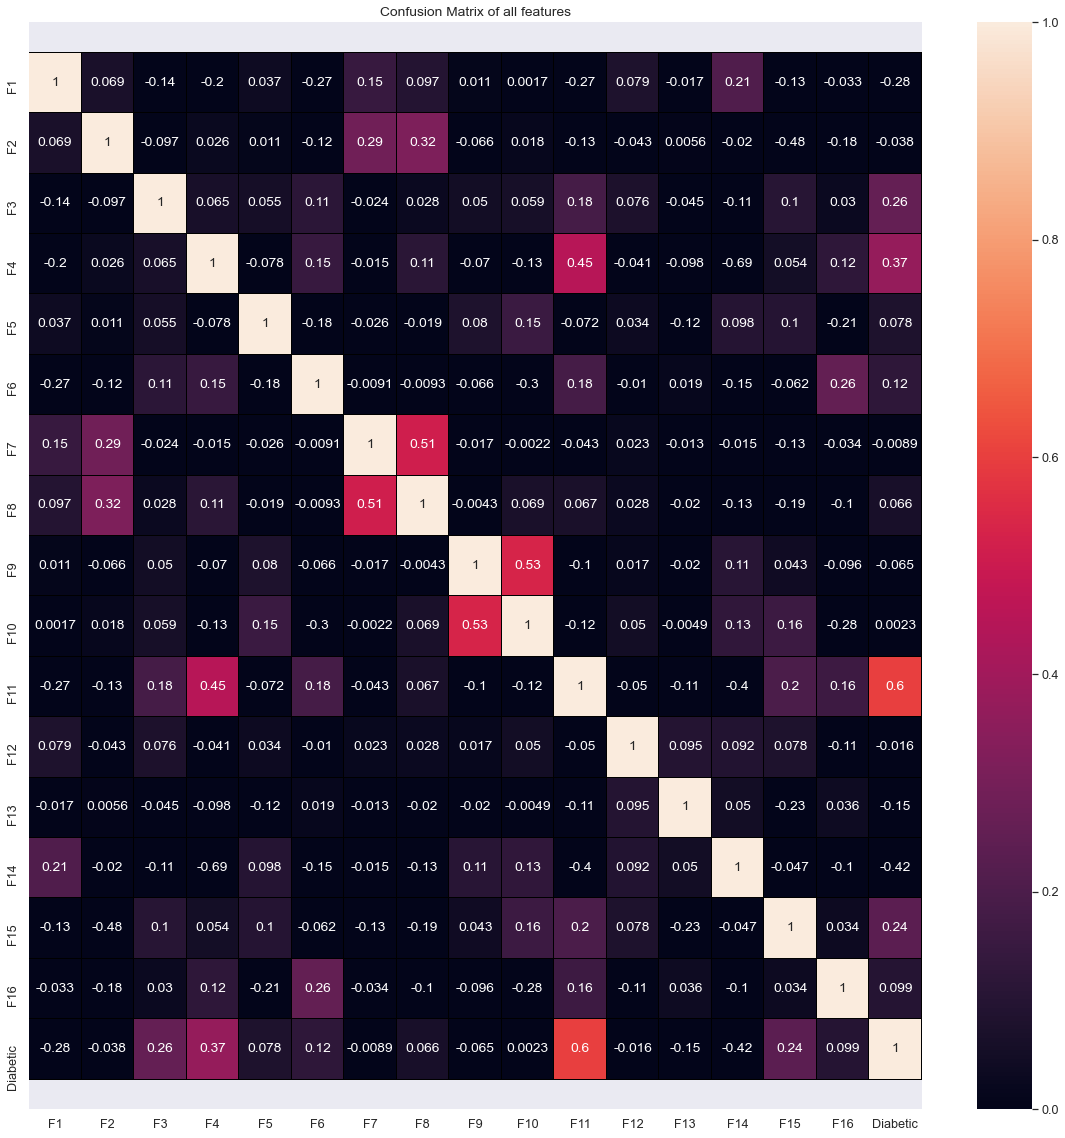

In [41]:
data_plot (data,
          Pair_plot=True,
          Dist_Plot=True,
          Plot_violinplot=True,
          Plot_confusionMatrix=True,
          box_Gaussian=False)

# Data Preprocessing  

In [42]:
data.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Diabetic
0,1.0,1.0,0.0,1.0,3.0,39.0,0.0,0.0,8.0,6.0,0.0,1.0,2.0,0.0,0.0,0.0,0
1,1.0,1.0,0.0,1.0,0.0,28.0,0.0,0.0,8.0,6.0,1.0,3.0,2.0,2.0,0.0,0.0,0
2,0.0,1.0,0.0,0.0,3.0,24.0,0.0,0.0,6.0,6.0,0.0,1.0,2.0,2.0,0.0,0.0,0
3,1.0,1.0,0.0,0.0,3.0,23.0,0.0,0.0,8.0,6.0,0.0,1.0,2.0,2.0,0.0,0.0,0
4,0.0,1.0,0.0,0.0,0.0,27.0,0.0,0.0,8.0,8.0,0.0,1.0,2.0,2.0,0.0,0.0,0


In [43]:
data.shape

(951, 17)

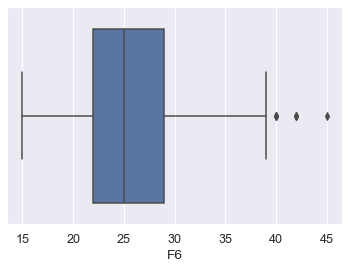

In [44]:
import seaborn as sns
sns.boxplot(data['F6'])



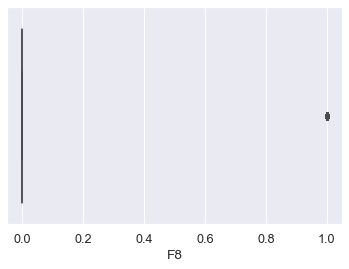

In [45]:
import seaborn as sns
sns.boxplot(data['F8'])


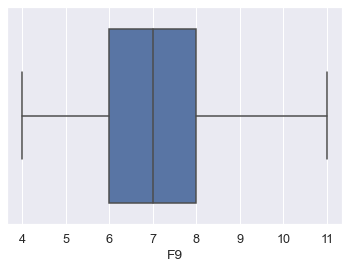

In [46]:
import seaborn as sns
sns.boxplot(data['F9'])


In [47]:
def outliers(column):
    anomaly = []
    above_third_quartile = column.mean()+3*column.std()
    below_third_quartile = column.mean()-column.std()
    
    for value in column:
        if value < below_third_quartile or value> above_third_quartile:
            anomaly.append(value)
    return anomaly
            

In [48]:
### Removing Outliers from the numeric columns
def outliers_removal(column):
    avg = column.mean()
    anomaly = outliers(column)
    for val in column:
        if val in anomaly:
            column.replace(val, avg, inplace = True)
    return column
    

In [49]:
Q1 = np.percentile(data['F6'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(data['F6'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", data.shape)
 
# Upper bound
upper = np.where(data['F6'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(data['SLEEP'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
data.drop(upper[0], inplace = True)
data.drop(lower[0], inplace = True)
 
print("New Shape: ", data.shape)

Old Shape:  (951, 17)


KeyError: 'SLEEP'

In [50]:
Q1 = np.percentile(data['SOUNDSLEEP'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(data['SOUNDSLEEP'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", data.shape)
 
# Upper bound
upper = np.where(data['SOUNDSLEEP'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(data['SOUNDSLEEP'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
data.drop(upper[0], inplace = True)
data.drop(lower[0], inplace = True)
 
print("New Shape: ", data.shape)

KeyError: 'SOUNDSLEEP'

In [51]:
data['F6'] = outliers_removal(data['F6'])

In [52]:
data['F8'] = outliers_removal(data['F8'])

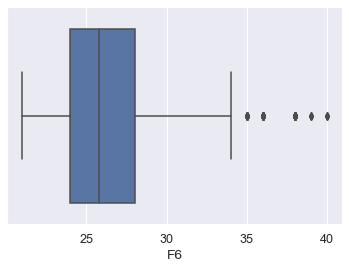

In [53]:
import seaborn as sns
sns.boxplot(data['F6'])


In [54]:
print('Shape Before Process: ' + str(data.shape))
##########################################################################

#The process for the outlier rejection (P)

 #data = outlier_Rejection (data,
                  #iqr_Mean=False,
                  #iqr_Medain=False,
                   #iqr=True,
                   #manual=False)
# print('Shape After outlier Removed: ' + str(data.shape))

##########################################################################

## The process for the filling missing values (Q)

# for col in ['F1', 'F2', 'F3', 'F4', 'F5', 'F6']:   
#     replace_zero(data, col, 'Diabetic')              
# print('Shape After Filling Missing Value: ' + str(data.shape))
     

##########################################################################
#  algo parameters are
# 'PCA','ICA','corr','None'

X_Data,Y_Lavel = feature_Selector(data, algo='corr', n_feature=9)    
print('Shape After Feature Selection: ' + str(data.shape))


##########################################################################
# The process of Standardization  (S)
# scaler =  preprocessing.StandardScaler()
# X_Data,Y_Lavel= scaler.fit_transform(X_Data), Y_Lavel
# print('Shape After Standardization: ' + str(data.shape))          


##########################################################################
# Stratified K-Folds cross-validator
# Provides train/test indices to split
# data in train/test sets.This cross-validation
#  object is a variation of KFold that returns 
#  stratified folds. The folds are made by preserving 
#  the percentage of samples for each class.

kf = StratifiedKFold(n_splits=5,
                     shuffle=True,
                     random_state=random_initializer)

Shape Before Process: (951, 17)
Shape After Feature Selection: (951, 17)


# Processed Data Plot and Presenation

<Figure size 432x288 with 0 Axes>

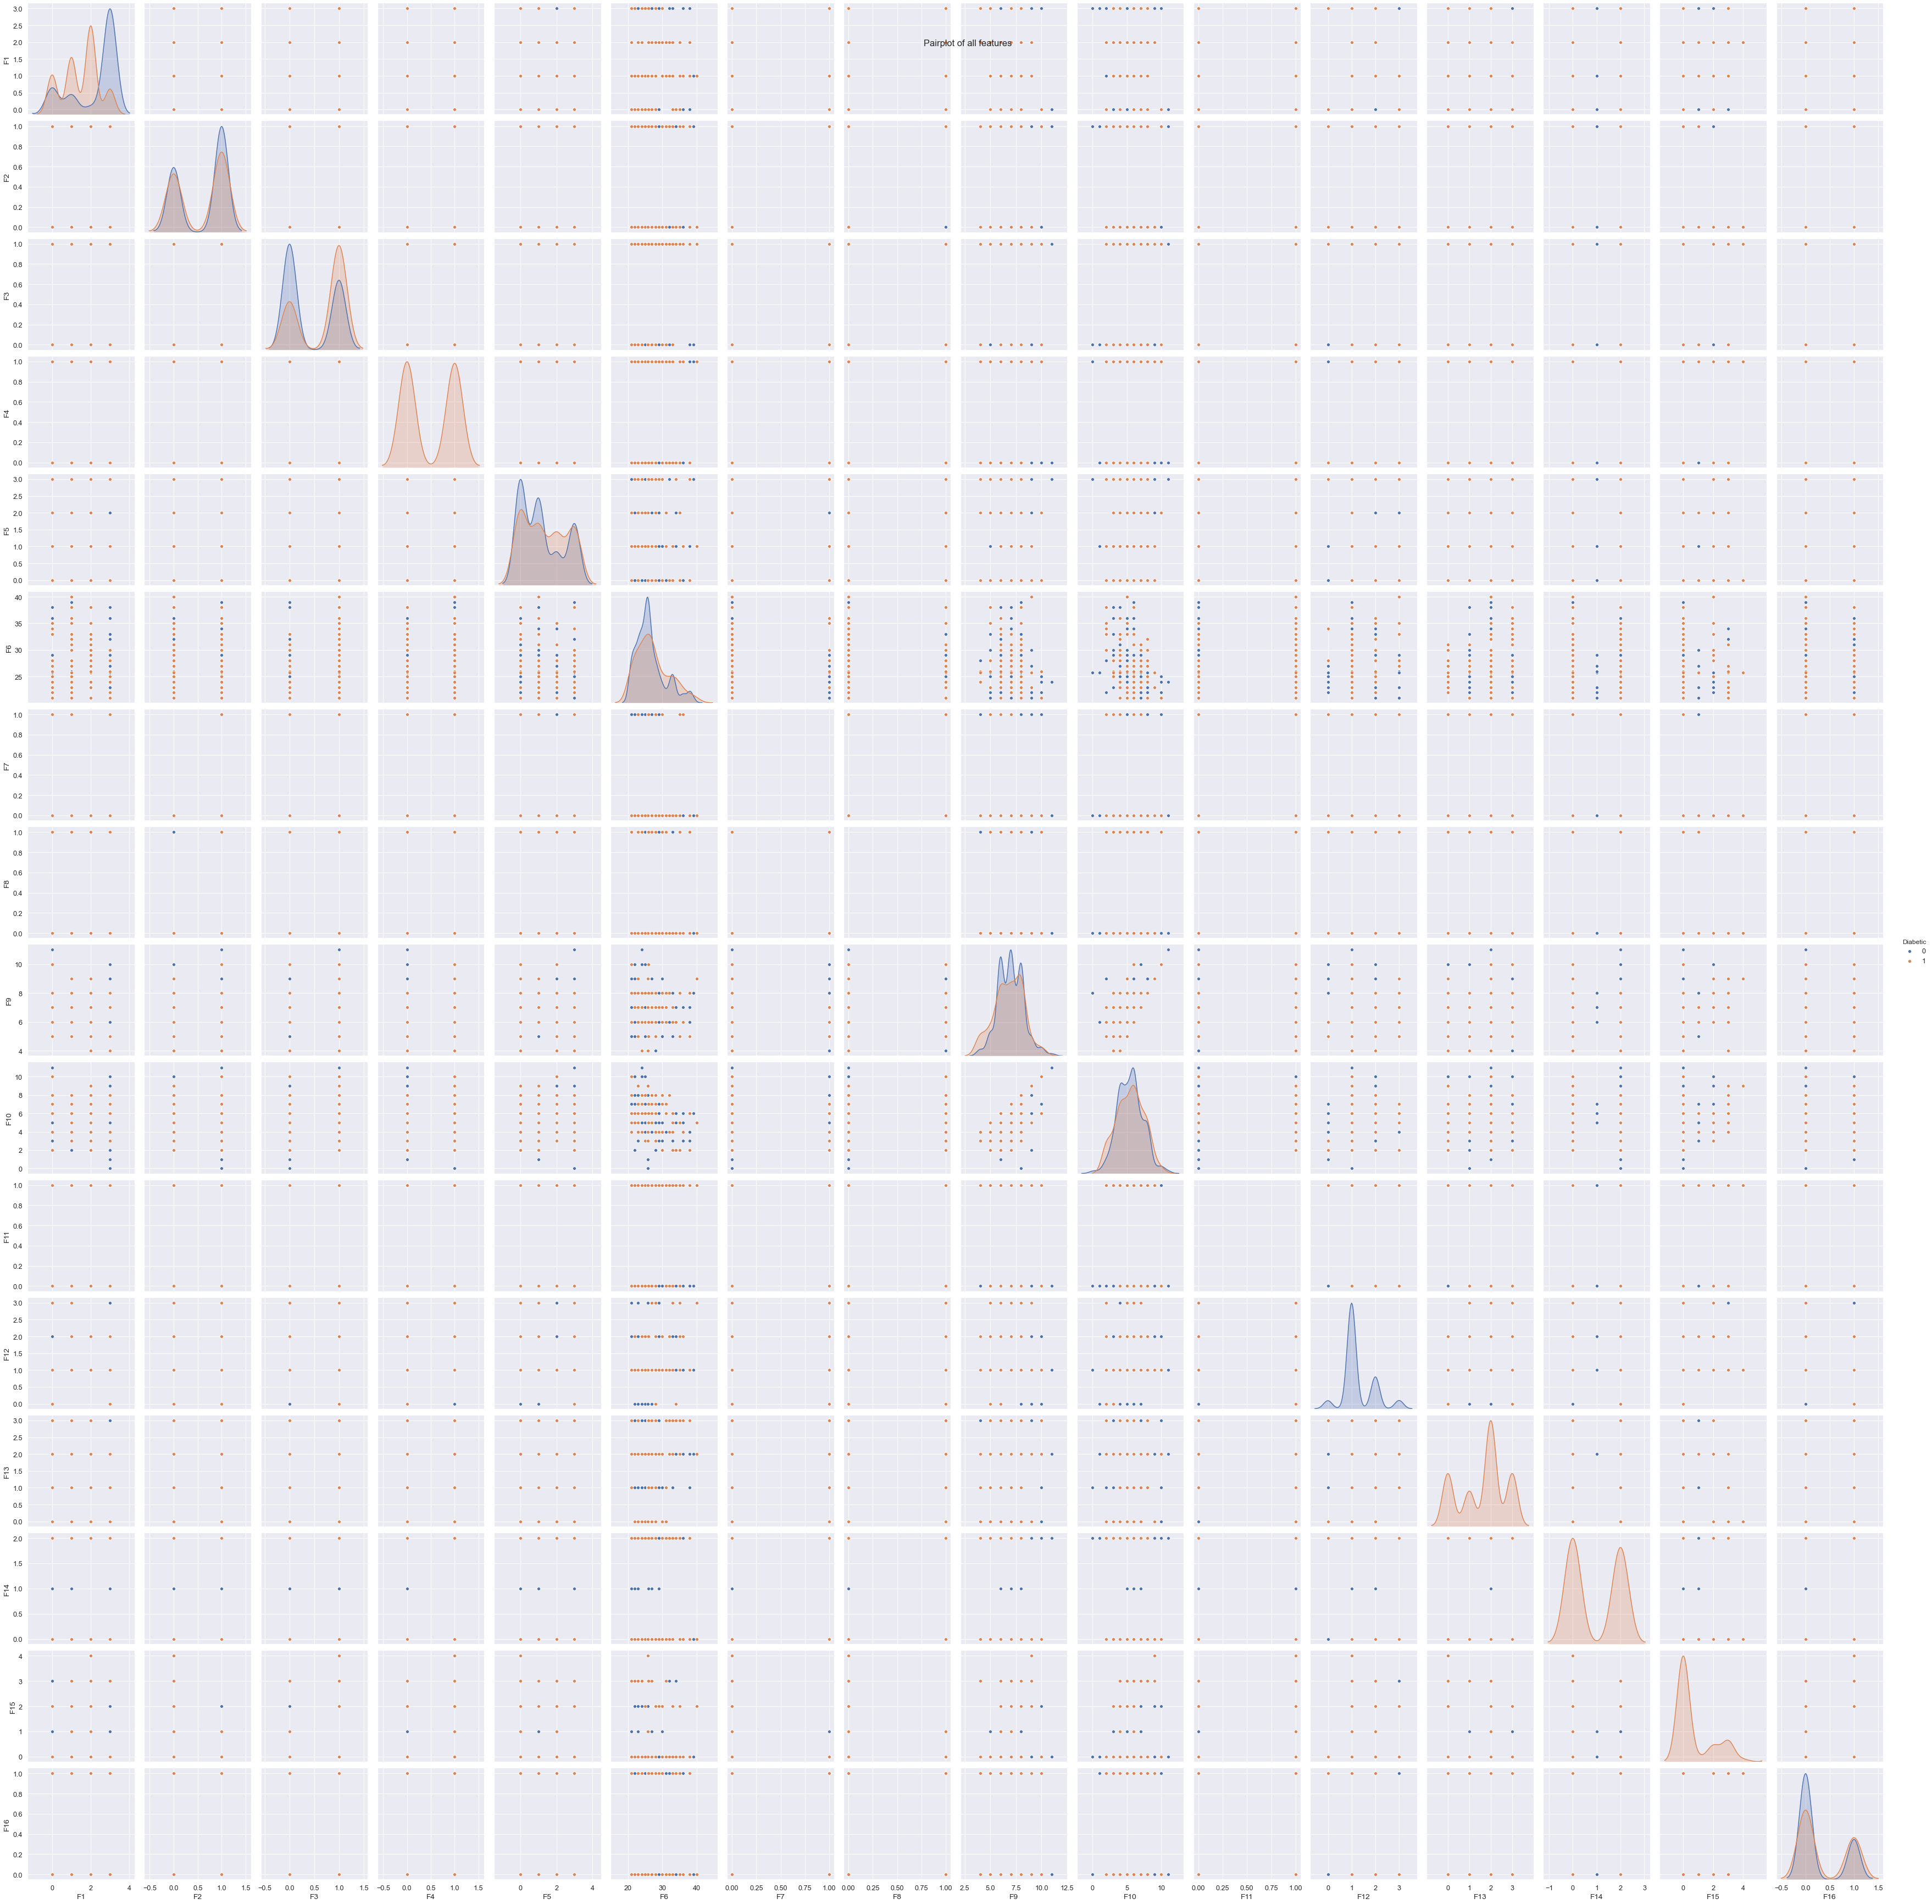

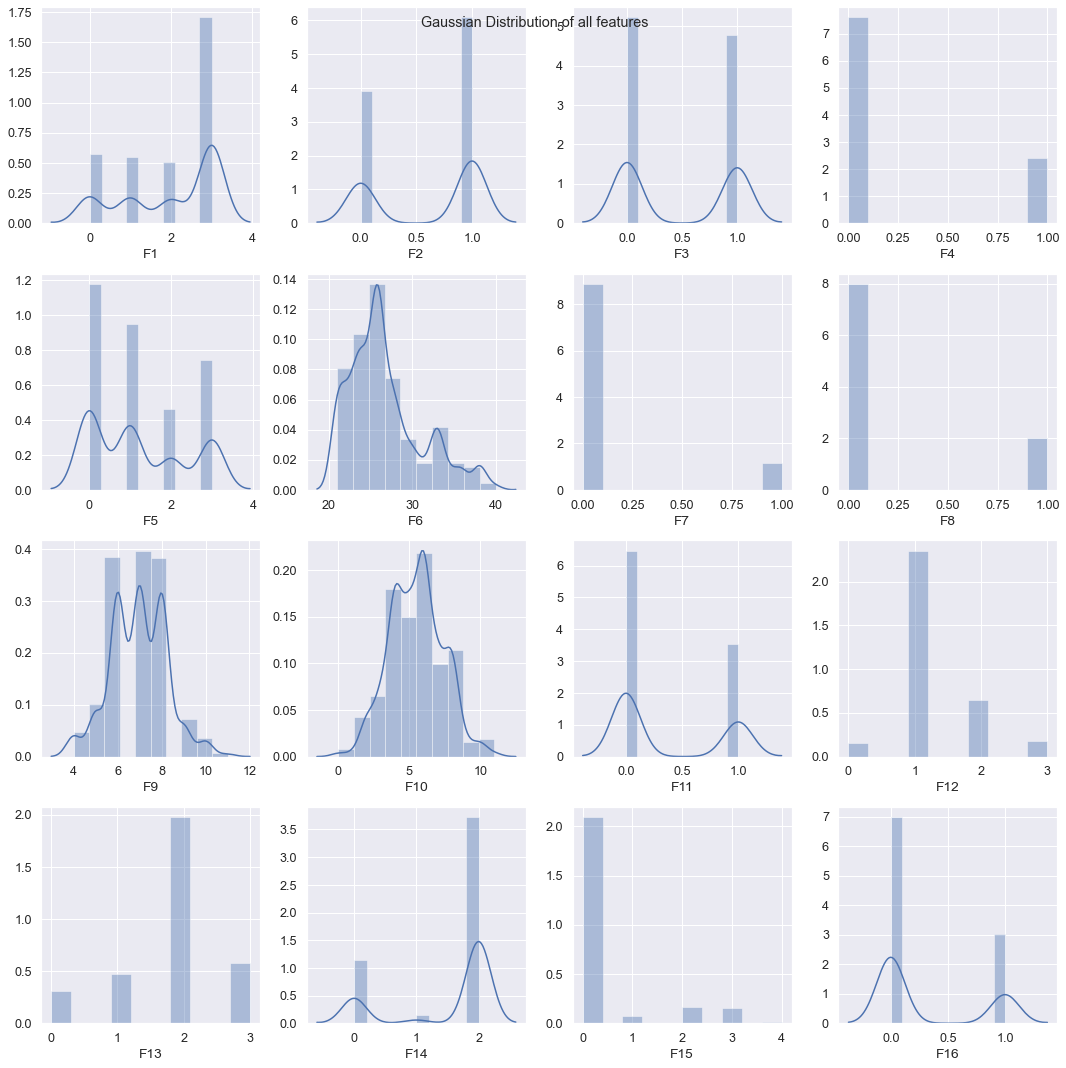

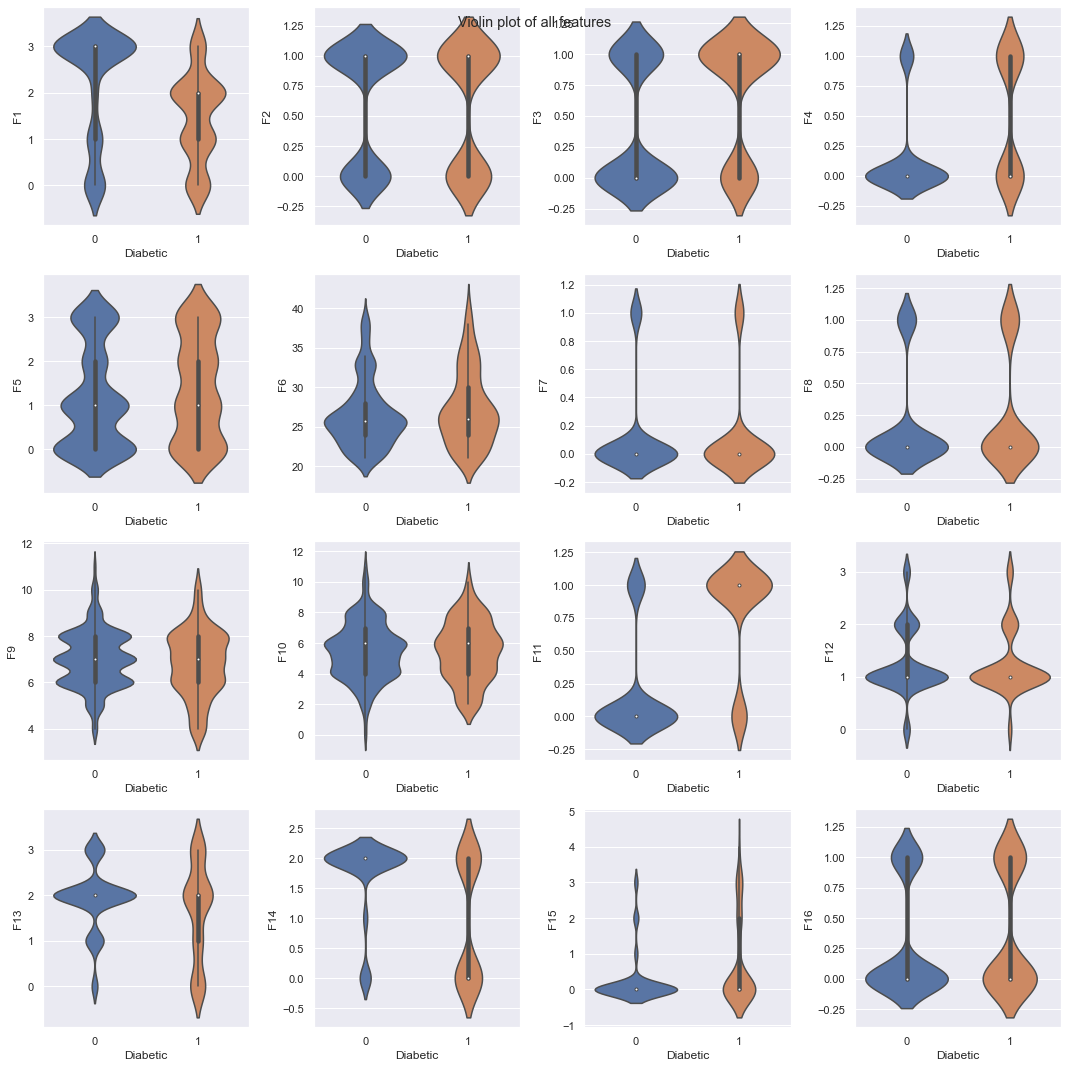

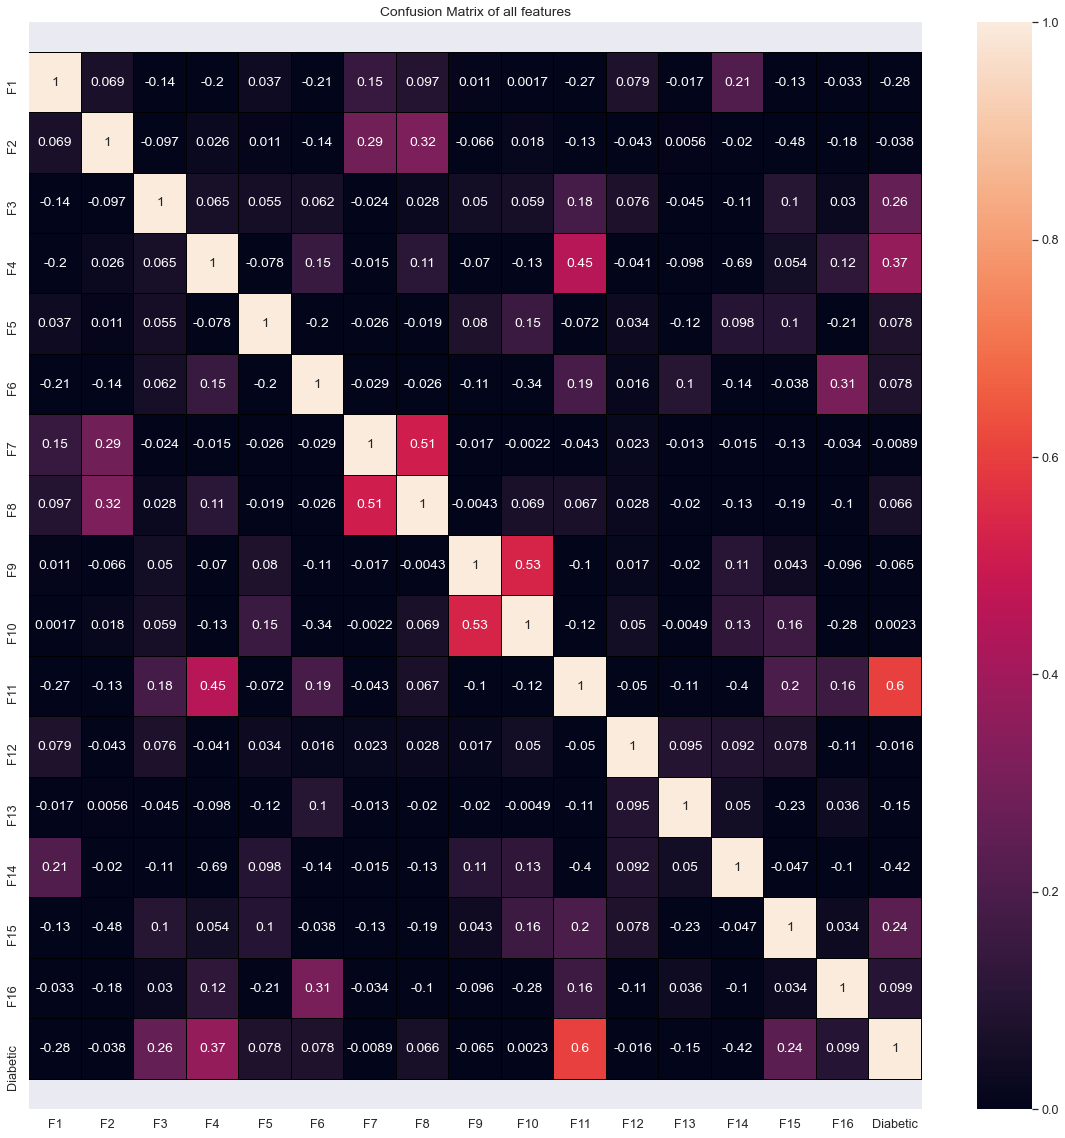

In [55]:
data_plot (data,
          Pair_plot=True,
          Dist_Plot=True,
          Plot_violinplot=True,
          Plot_confusionMatrix=True,
          box_Gaussian=False)

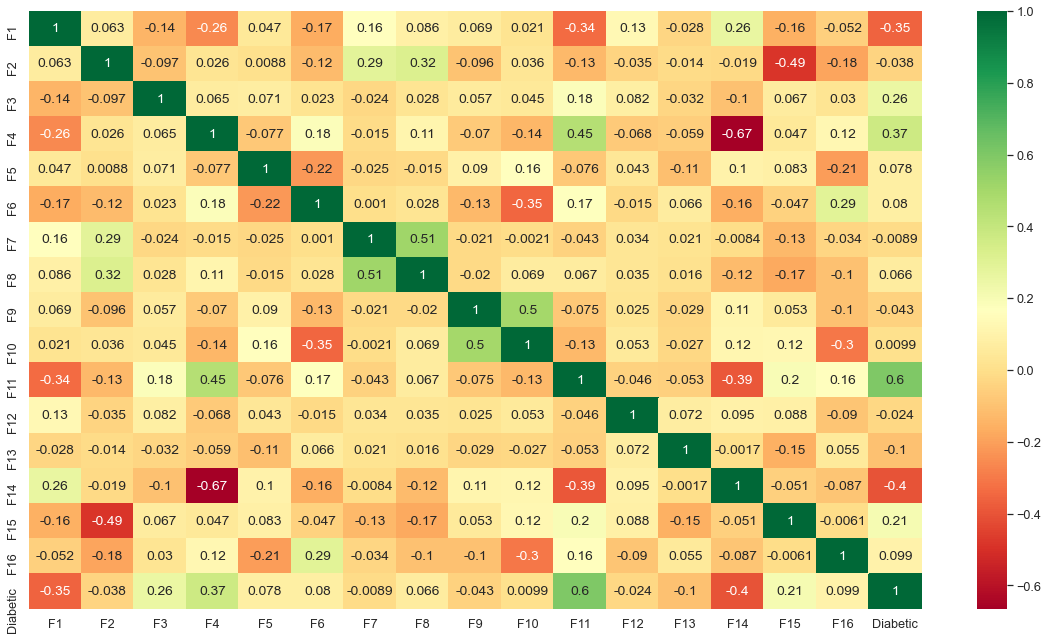

<Figure size 432x288 with 0 Axes>

In [56]:
plt.subplots(figsize=(20,11))
heat_plot = sns.heatmap(data.corr(method='spearman'),annot=True, cmap= "RdYlGn")
plt.figure()
plt.show()

In [57]:
data1=data

In [58]:
X=data1.drop(columns=['Diabetic'])
Y=data1['Diabetic']

In [59]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
#Chi square is usually determines the relationship between features when compared to target variable

best_features_diabetes= SelectKBest(score_func= chi2, k=10)
fit=best_features_diabetes.fit(X,Y)

feature_scoring_importance= pd.DataFrame(fit.scores_)
feature_name= pd.DataFrame(X.columns)

concat_feature_metric_evaluation= pd.concat([feature_name, feature_scoring_importance],  axis=1)
concat_feature_metric_evaluation.columns=['feature', 'Score']

print(concat_feature_metric_evaluation.nlargest(9,'Score'))


   feature       Score
10     F11  219.939865
14     F15  115.601121
3       F4  101.337031
13     F14   76.762536
0       F1   51.682133
2       F3   33.088281
12     F13    8.131052
15     F16    6.516330
4       F5    6.271310


### Analyzing KNN model

--------------------------------------------------
Detailed classification report for current fold:

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       137
           1       0.87      0.85      0.86        54

    accuracy                           0.92       191
   macro avg       0.90      0.90      0.90       191
weighted avg       0.92      0.92      0.92       191


Area Under ROC (AUC): 0.9447823736144904

Confusion Matrix for current fold: 
[[130   7]
 [  8  46]]

Accuracy for Current Fold: 0.9214659685863874

--------------------------------------------------
Detailed classification report for current fold:

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       137
           1       0.92      0.89      0.90        53

    accuracy                           0.95       190
   macro avg       0.94      0.93      0.93       190
weighted avg       0.95      0.95      0.95      

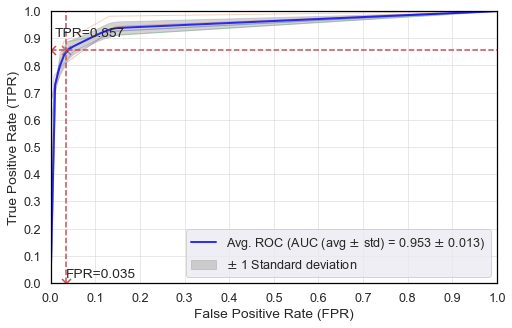


---------------------Average---------------------
AUC (Avg. +/- Std.) is  0.953 +/- 0.013
Accuracy (Avg. +/- Std.) is  0.935 +/- 0.011
Avg. CM is [[45, 4], [7, 132]]
Total for all folds CM is [[228, 24], [38, 661]]
Sensitivity (Avg. +/- Std.) is  0.857 +/- 0.028
Specificity (Avg. +/- Std.) is  0.965 +/- 0.010
Precision (Avg. +/- Std.) is  0.905 +/- 0.024
FOR (Avg. +/- Std.) is  0.054 +/- 0.010
DOR (Avg. +/- Std.) is  187.763 +/- 65.950

{'algorithm': 'kd_tree', 'leaf_size': 40, 'n_neighbors': 3, 'p': 2}


In [60]:
Accuracy = []                                                                # for store the value of accuracy 
FP = []                                                                      # for store False Positive 
TN = []                                                                      # for True Negative
FN = []                                                                      # for False Negative
TP = []                                                                      # for True Positive
tprs = []                                                                    # for true positive rates
aucs_kNN = []                                                                # for store the values of auc
iterator=0
mean_fpr = np.linspace(0, 1, 100)
fig = plt.figure(figsize=(8, 5))
sn = []                                                                      # for sensitivity 
sp = []                                                                      # for specificity
pr = []                                                                      # for precision
FOR = []                                                                     # for False omission rate 
DOR = [] 
for train_index, test_index in kf.split(X_Data,Y_Lavel):                     # split in train and test
    #   print("TRAIN:", train_index, "TEST:", test_index)
    X_Train, X_Test = X_Data[train_index], X_Data[test_index]                #train data and label
    Y_Train, Y_Test = Y_Lavel[train_index], Y_Lavel[test_index]              #test data and label

    ###########################################
    # define the hyper parameters of Knn
    n_neighbors = [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39,41,43,45,47,49]
    leaf_size = [5,10,15,20,25,30,35,40,45,50]
    Distance = [1,2]
    ############################################


    tuned_parameters = [ {'n_neighbors': n_neighbors,                         #define parameters with different algorithm
                        'algorithm' : ['brute'],
                        'p':Distance},

                         {'n_neighbors': n_neighbors, 
                        'algorithm' : ['ball_tree'],
                        'leaf_size' : leaf_size,
                        'p':Distance},

                        {'n_neighbors': n_neighbors, 
                        'algorithm' : ['kd_tree'],
                        'leaf_size' : leaf_size,
                        'p':Distance}]

    clf = creat_Model (classifier = KNeighborsClassifier(),                     #create the model 
                      X_Train = X_Train,
                      Y_Train = Y_Train,
                      tuned_parameters = tuned_parameters,
                      verbose=0)

    tn, fp, fn, tp, roc_auc, fpr, tpr = metrics (y_true = Y_Test,               #get the values of  model evaluation 
                                                y_pred = clf.predict(X_Test),
                                                probas_ = clf.predict_proba(X_Test))
    tprs.append(interp(mean_fpr, fpr, tpr))                                     
    tprs[-1][0] = 0.0
    aucs_kNN.append(roc_auc)
    plot_Current_ROC (fpr,tpr,iterator,roc_auc)                                 #plot the roc of current fold
    iterator += 1
    TN.append(tn)
    FP.append(fp)
    FN.append(fn)
    TP.append(tp)

    Accuracy.append(accuracy_score(Y_Test, clf.predict(X_Test)))
    sn.append(tp/(tp+fn))
    sp.append(tn/(fp+tn))
    pr.append(tp/(tp+fp))
    FOR.append(fn/(tn+fn))
    DOR.append((tp*tn)/(fp*fn))
average_ROC(mean_fpr,tprs,aucs_kNN,TP,TN,FP,FN)                                 #plot average roc curve
average_performance(aucs_kNN,Accuracy,TP,TN,FP,FN)                              #print the average performance of the model
#####################################################################
#    print the sensitivity,specificity,precision,for,dor of model
#####################################################################
print("Sensitivity (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(sn),np.std(sn)))
print("Specificity (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(sp),np.std(sp)))
print("Precision (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(pr),np.std(pr)))
print("FOR (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(FOR),np.std(FOR)))
print("DOR (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(DOR),np.std(DOR)))
print()
print(clf.best_params_)


### Analyzing  Decision Trees Classifier

--------------------------------------------------
Detailed classification report for current fold:

              precision    recall  f1-score   support

           0       0.88      0.93      0.90       137
           1       0.80      0.67      0.73        54

    accuracy                           0.86       191
   macro avg       0.84      0.80      0.82       191
weighted avg       0.86      0.86      0.85       191


Area Under ROC (AUC): 0.9171397675047309

Confusion Matrix for current fold: 
[[128   9]
 [ 18  36]]

Accuracy for Current Fold: 0.8586387434554974

--------------------------------------------------
Detailed classification report for current fold:

              precision    recall  f1-score   support

           0       0.90      0.89      0.90       137
           1       0.73      0.75      0.74        53

    accuracy                           0.85       190
   macro avg       0.82      0.82      0.82       190
weighted avg       0.85      0.85      0.85      

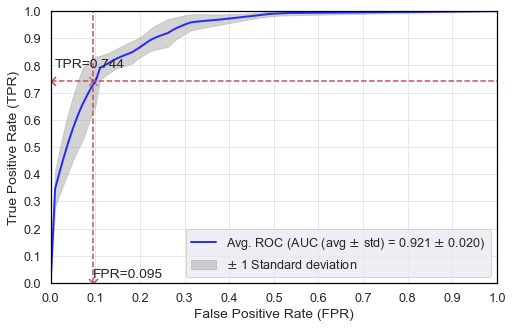


---------------------Average---------------------
AUC (Avg. +/- Std.) is  0.921 +/- 0.020
Accuracy (Avg. +/- Std.) is  0.860 +/- 0.029
Avg. CM is [[39, 13], [13, 124]]
Total for all folds CM is [[198, 65], [68, 620]]
Sensitivity (Avg. +/- Std.) is  0.604 +/- 0.000
Specificity (Avg. +/- Std.) is  0.898 +/- 0.000
Precision (Avg. +/- Std.) is  0.696 +/- 0.000
FOR (Avg. +/- Std.) is  0.146 +/- 0.000
DOR (Avg. +/- Std.) is  13.388 +/- 0.000
{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 0.1, 'splitter': 'best'}


In [61]:
Accuracy = []                                                                # for store the value of accuracy 
FP = []                                                                      # for store False Positive 
TN = []                                                                      # for True Negative
FN = []                                                                      # for False Negative
TP = []                                                                      # for True Positive
tprs = []                                                                    # for true positive rates
aucs_Tree = []                                                               # for store the values of auc of tree model
iterator=0
mean_fpr = np.linspace(0, 1, 100)
fig = plt.figure(figsize=(8, 5))
sn = []                                                                      # for sensitivity 
sp = []                                                                      # for specificity
pr = []                                                                      # for precision
FOR = []                                                                     # for False omission rate 
DOR = []                                                                     # for Diagnostic odds ratio (DOR)

for train_index, test_index in kf.split(X_Data,Y_Lavel):
    #   print("TRAIN:", train_index, "TEST:", test_index)
    X_Train, X_Test = X_Data[train_index], X_Data[test_index]
    Y_Train, Y_Test = Y_Lavel[train_index], Y_Lavel[test_index]

                                                                            # define the decision tree parameters 

    tuned_parameters = {'criterion': ['gini','entropy'],
                       'splitter': ['best'],
                       'min_samples_split':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
                       'min_samples_leaf': [1,2,3,4,5] }

    clf = creat_Model (classifier = DecisionTreeClassifier( random_state=random_initializer),
                      X_Train = X_Train,                                    # create the model using DecisionTree Classifier 
                      Y_Train = Y_Train,
                      tuned_parameters = tuned_parameters,
                      verbose=0)

    tn, fp, fn, tp, roc_auc, fpr, tpr = metrics (y_true = Y_Test,           #get the evaluation parameters of model
                                                y_pred = clf.predict(X_Test),
                                                probas_ = clf.predict_proba(X_Test))
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    aucs_Tree.append(roc_auc)                                                # plot the roc of current fold
    iterator += 1
    TN.append(tn)
    FP.append(fp)
    FN.append(fn)
    TP.append(tp)
    Accuracy.append(accuracy_score(Y_Test, clf.predict(X_Test)))
sn.append(tp/(tp+fn))
sp.append(tn/(fp+tn))
pr.append(tp/(tp+fp))
FOR.append(fn/(tn+fn))
DOR.append((tp*tn)/(fp*fn))
average_ROC(mean_fpr,tprs,aucs_Tree,TP,TN,FP,FN)                             #plot average roc curve
average_performance(aucs_Tree,Accuracy,TP,TN,FP,FN)                              #print the average performance of the model
#####################################################################
#    print the sensitivity,specificity,precision,for,dor of model
#####################################################################
print("Sensitivity (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(sn),np.std(sn)))
print("Specificity (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(sp),np.std(sp)))
print("Precision (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(pr),np.std(pr)))
print("FOR (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(FOR),np.std(FOR)))
print("DOR (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(DOR),np.std(DOR)))
print(clf.best_params_)

### Analyzing Random Forest Classifier

--------------------------------------------------
Detailed classification report for current fold:

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       137
           1       0.92      0.89      0.91        54

    accuracy                           0.95       191
   macro avg       0.94      0.93      0.93       191
weighted avg       0.95      0.95      0.95       191


Area Under ROC (AUC): 0.9666801838334684

Confusion Matrix for current fold: 
[[133   4]
 [  6  48]]

Accuracy for Current Fold: 0.9476439790575916

--------------------------------------------------
Detailed classification report for current fold:

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       137
           1       0.98      0.94      0.96        53

    accuracy                           0.98       190
   macro avg       0.98      0.97      0.97       190
weighted avg       0.98      0.98      0.98      

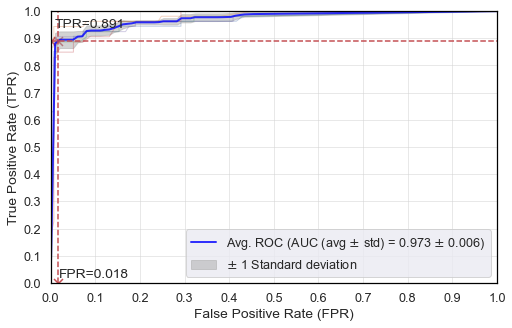


---------------------Average---------------------
AUC (Avg. +/- Std.) is  0.973 +/- 0.006
Accuracy (Avg. +/- Std.) is  0.957 +/- 0.013
Avg. CM is [[47, 2], [5, 134]]
Total for all folds CM is [[237, 12], [29, 673]]
Sensitivity (Avg. +/- Std.) is  0.891 +/- 0.037
Specificity (Avg. +/- Std.) is  0.985 +/- 0.000
Precision (Avg. +/- Std.) is  0.960 +/- 0.000
FOR (Avg. +/- Std.) is  0.036 +/- 0.000
DOR (Avg. +/- Std.) is  648.000 +/- 0.000
{'criterion': 'entropy', 'n_estimators': 200}


In [62]:
Accuracy = []                                                                # for store the value of accuracy 
FP = []                                                                      # for store False Positive 
TN = []                                                                      # for True Negative
FN = []                                                                      # for False Negative
TP = []                                                                      # for True Positive
tprs = []                                                                    # for true positive rates
aucs_Forest = []                                                             # for store the values of auc of Random Forest model
iterator=0
mean_fpr = np.linspace(0, 1, 100)
fig = plt.figure(figsize=(8, 5))
sn = []                                                                      # for sensitivity 
sp = []                                                                      # for specificity
pr = []                                                                      # for precision
FOR = []                                                                     # for False omission rate 
DOR = []                                                                     # for Diagnostic odds ratio (DOR)


for train_index, test_index in kf.split(X_Data,Y_Lavel):                     #split dataset into train /test
#   print("TRAIN:", train_index, "TEST:", test_index)
    X_Train, X_Test = X_Data[train_index], X_Data[test_index]                # data and label of train dataset
    Y_Train, Y_Test = Y_Lavel[train_index], Y_Lavel[test_index]              # data and label of test dataset

    # parameters of Random Forest model
    tuned_parameters = {'criterion': ['gini','entropy'],
                        'n_estimators': [10,50,100,200]}

    clf = creat_Model (classifier = RandomForestClassifier( random_state=random_initializer),
                      X_Train = X_Train,                                      # create a model using random forest classifier
                      Y_Train = Y_Train,
                      tuned_parameters = tuned_parameters,
                      verbose=0)

    tn, fp, fn, tp, roc_auc, fpr, tpr = metrics (y_true = Y_Test,              #evaluation parameters of random forest model
                                                y_pred = clf.predict(X_Test),
                                                probas_ = clf.predict_proba(X_Test))
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    aucs_Forest.append(roc_auc)
    plot_Current_ROC (fpr,tpr,iterator,roc_auc)                               #plot the roc of current fold
    iterator += 1
    TN.append(tn)
    FP.append(fp)
    FN.append(fn)
    TP.append(tp)
    Accuracy.append(accuracy_score(Y_Test, clf.predict(X_Test)))
    sn.append(tp/(tp+fn))
sp.append(tn/(fp+tn))
pr.append(tp/(tp+fp))
FOR.append(fn/(tn+fn))
DOR.append((tp*tn)/(fp*fn))
  

average_ROC(mean_fpr,tprs,aucs_Forest,TP,TN,FP,FN)                            #plot average roc curve
average_performance(aucs_Forest,Accuracy,TP,TN,FP,FN)                                    #print the average performance of the model
#####################################################################
#    print the sensitivity,specificity,precision,for,dor of model
#####################################################################
print("Sensitivity (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(sn),np.std(sn)))
print("Specificity (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(sp),np.std(sp)))
print("Precision (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(pr),np.std(pr)))
print("FOR (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(FOR),np.std(FOR)))
print("DOR (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(DOR),np.std(DOR)))
print(clf.best_params_)

In [63]:
print(clf.best_score_)

0.9803326877233427


In [64]:
pd.show_versions()


INSTALLED VERSIONS
------------------
commit           : None
python           : 3.8.3.final.0
python-bits      : 64
OS               : Windows
OS-release       : 10
machine          : AMD64
processor        : Intel64 Family 6 Model 142 Stepping 9, GenuineIntel
byteorder        : little
LC_ALL           : None
LANG             : None
LOCALE           : English_India.utf8

pandas           : 1.0.5
numpy            : 1.18.5
pytz             : 2020.1
dateutil         : 2.8.1
pip              : 20.1.1
setuptools       : 49.2.0.post20200714
Cython           : 0.29.21
pytest           : 5.4.3
hypothesis       : None
sphinx           : 3.1.2
blosc            : None
feather          : None
xlsxwriter       : 1.2.9
lxml.etree       : 4.5.2
html5lib         : 1.1
pymysql          : None
psycopg2         : None
jinja2           : 2.11.2
IPython          : 7.16.1
pandas_datareader: None
bs4              : 4.9.1
bottleneck       : 1.3.2
fastparquet      : None
gcsfs            : None
lxml.etree   

In [65]:
import seaborn as sns
sns.__version__

'0.10.1'

In [66]:
!pip install rfpimp

### Analyzing AdaBoost Classifier

--------------------------------------------------
Detailed classification report for current fold:

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       137
           1       0.77      0.69      0.73        54

    accuracy                           0.85       191
   macro avg       0.83      0.80      0.81       191
weighted avg       0.85      0.85      0.85       191


Area Under ROC (AUC): 0.9165314949986482

Confusion Matrix for current fold: 
[[126  11]
 [ 17  37]]

Accuracy for Current Fold: 0.8534031413612565

--------------------------------------------------
Detailed classification report for current fold:

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       137
           1       0.75      0.72      0.73        53

    accuracy                           0.85       190
   macro avg       0.82      0.81      0.81       190
weighted avg       0.85      0.85      0.85      

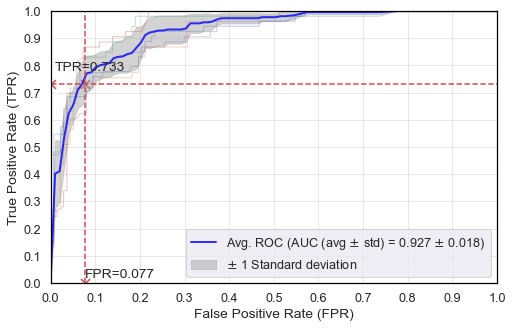


---------------------Average---------------------
AUC (Avg. +/- Std.) is  0.927 +/- 0.018
Accuracy (Avg. +/- Std.) is  0.870 +/- 0.028
Avg. CM is [[39, 10], [14, 126]]
Total for all folds CM is [[195, 53], [71, 632]]
Sensitivity (Avg. +/- Std.) is  0.623 +/- 0.000
Specificity (Avg. +/- Std.) is  0.920 +/- 0.000
Precision (Avg. +/- Std.) is  0.750 +/- 0.000
FOR (Avg. +/- Std.) is  0.137 +/- 0.000
DOR (Avg. +/- Std.) is  18.900 +/- 0.000
{'algorithm': 'SAMME.R', 'learning_rate': 0.5, 'n_estimators': 50}


In [67]:
Accuracy = []                                                                # for store the value of accuracy 
FP = []                                                                      # for store False Positive 
TN = []                                                                      # for True Negative
FN = []                                                                      # for False Negative
TP = []                                                                      # for True Positive
tprs = []                                                                    # for true positive rates
aucs_aBoost = []                                                             # for store the values of auc of Adaboost model
iterator=0
mean_fpr = np.linspace(0, 1, 100)
fig = plt.figure(figsize=(8, 5))
sn = []                                                                      # for sensitivity 
sp = []                                                                      # for specificity
pr = []                                                                      # for precision
FOR = []                                                                     # for False omission rate 
DOR = []                                                                     # for Diagnostic odds ratio (DOR)

for train_index, test_index in kf.split(X_Data,Y_Lavel):                     #split into train and test 
    #   print("TRAIN:", train_index, "TEST:", test_index)
    X_Train, X_Test = X_Data[train_index], X_Data[test_index]                #data and label
    Y_Train, Y_Test = Y_Lavel[train_index], Y_Lavel[test_index]              #data and label

    #####################################################
    # define the parameters of adaboost algorithm
    #####################################################
    tuned_parameters = { 'algorithm': ['SAMME','SAMME.R'],
                       'learning_rate':[0.1,0.5,1.0],
                       'n_estimators': [10,50,100,200]}

    
    clf = creat_Model (classifier = AdaBoostClassifier( random_state=random_initializer),
                      X_Train = X_Train,                                      # create a model using  AdaBoost Classifier
                      Y_Train = Y_Train,
                      tuned_parameters = tuned_parameters,
                      verbose=0)
    tn, fp, fn, tp, roc_auc, fpr, tpr = metrics (y_true = Y_Test,             # model evaluation parametrs
                                                y_pred = clf.predict(X_Test),
                                                probas_ = clf.predict_proba(X_Test))
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    aucs_aBoost.append(roc_auc)
    plot_Current_ROC (fpr,tpr,iterator,roc_auc)                              #plot the roc of current fold
    iterator += 1
    TN.append(tn)
    FP.append(fp)
    FN.append(fn)
    TP.append(tp)
    Accuracy.append(accuracy_score(Y_Test, clf.predict(X_Test)))
sn.append(tp/(tp+fn))
sp.append(tn/(fp+tn))
pr.append(tp/(tp+fp))
FOR.append(fn/(tn+fn))
DOR.append((tp*tn)/(fp*fn))
average_ROC(mean_fpr,tprs,aucs_aBoost,TP,TN,FP,FN)                           #plot average roc curve
average_performance(aucs_aBoost,Accuracy,TP,TN,FP,FN)                                  #print the average performance of the model
#####################################################################
#    print the sensitivity,specificity,precision,for,dor of model
#####################################################################
print("Sensitivity (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(sn),np.std(sn)))
print("Specificity (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(sp),np.std(sp)))
print("Precision (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(pr),np.std(pr)))
print("FOR (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(FOR),np.std(FOR)))
print("DOR (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(DOR),np.std(DOR)))
print(clf.best_params_)

### Analyzing Naive Bayes Model

--------------------------------------------------
Detailed classification report for current fold:

              precision    recall  f1-score   support

           0       0.87      0.78      0.82       137
           1       0.56      0.70      0.62        54

    accuracy                           0.76       191
   macro avg       0.71      0.74      0.72       191
weighted avg       0.78      0.76      0.77       191


Area Under ROC (AUC): 0.8497566909975669

Confusion Matrix for current fold: 
[[107  30]
 [ 16  38]]

Accuracy for Current Fold: 0.7591623036649214

--------------------------------------------------
Detailed classification report for current fold:

              precision    recall  f1-score   support

           0       0.85      0.81      0.83       137
           1       0.57      0.64      0.60        53

    accuracy                           0.76       190
   macro avg       0.71      0.73      0.72       190
weighted avg       0.77      0.76      0.77      

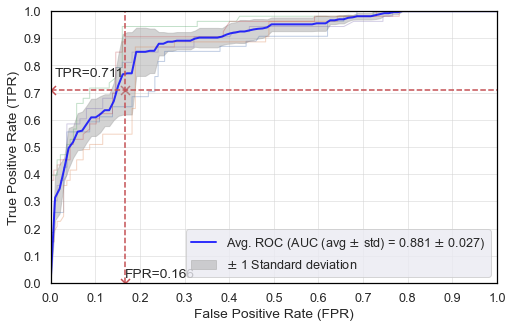


---------------------Average---------------------
AUC (Avg. +/- Std.) is  0.881 +/- 0.027
Accuracy (Avg. +/- Std.) is  0.799 +/- 0.032
Avg. CM is [[37, 22], [15, 114]]
Total for all folds CM is [[189, 114], [77, 571]]
Sensitivity (Avg. +/- Std.) is  0.792 +/- 0.000
Specificity (Avg. +/- Std.) is  0.854 +/- 0.000
Precision (Avg. +/- Std.) is  0.677 +/- 0.000
FOR (Avg. +/- Std.) is  0.086 +/- 0.000
DOR (Avg. +/- Std.) is  22.336 +/- 0.000
{'var_smoothing': 0.001}


In [68]:
Accuracy = []                                                                # for store the value of accuracy 
FP = []                                                                      # for store False Positive 
TN = []                                                                      # for True Negative
FN = []                                                                      # for False Negative
TP = []                                                                      # for True Positive
tprs = []                                                                    # for true positive rates
aucs_NB = []                                                                 # for store the values of auc of  model
iterator=0
sn = []                                                                      # for sensitivity 
sp = []                                                                      # for specificity
pr = []                                                                      # for precision
FOR = []                                                                     # for False omission rate 
DOR = []                                                                     # for Diagnostic odds ratio (DOR)

mean_fpr = np.linspace(0, 1, 100) 
fig = plt.figure(figsize=(8, 5))


for train_index, test_index in kf.split(X_Data,Y_Lavel):                     #split into train and test
#   print("TRAIN:", train_index, "TEST:", test_index)
    X_Train, X_Test = X_Data[train_index], X_Data[test_index]                #train data and label
    Y_Train, Y_Test = Y_Lavel[train_index], Y_Lavel[test_index]              #test  data and label


    #############################################
    # define parameters of Naive Bayes model 
    ############################################
    var_smoothing = [1e-01,
                    1e-02,
                    1e-03,
                    1e-04,
                    1e-05,
                    1e-06,
                    1e-07,
                    1e-08,
                    1e-09,
                    1e-10,
                    1e-11,
                    1e-12]

    tuned_parameters = [{'var_smoothing': var_smoothing}]

    #############################################################
    clf = creat_Model (classifier = GaussianNB(),                             # create model using Naive Bias
                      X_Train = X_Train,
                      Y_Train = Y_Train,
                      tuned_parameters = tuned_parameters,
                      verbose=0)
    tn, fp, fn, tp, roc_auc, fpr, tpr = metrics (y_true = Y_Test,             # model evaluation parameters
                                                y_pred = clf.predict(X_Test),
                                                probas_ = clf.predict_proba(X_Test))
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    aucs_NB.append(roc_auc)
    plot_Current_ROC (fpr,tpr,iterator,roc_auc)                               #plot the roc of current fold
    iterator += 1
    TN.append(tn)
    FP.append(fp)
    FN.append(fn)
    TP.append(tp)
    Accuracy.append(accuracy_score(Y_Test, clf.predict(X_Test)))
sn.append(tp/(tp+fn))
sp.append(tn/(fp+tn))
pr.append(tp/(tp+fp))
FOR.append(fn/(tn+fn))
DOR.append((tp*tn)/(fp*fn))
average_ROC(mean_fpr,tprs,aucs_NB,TP,TN,FP,FN)                               #plot average roc curve
average_performance(aucs_NB,Accuracy,TP,TN,FP,FN)                               #print the average performance of the model
#####################################################################
#    print the sensitivity,specificity,precision,for,dor of model
#####################################################################
print("Sensitivity (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(sn),np.std(sn)))
print("Specificity (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(sp),np.std(sp)))
print("Precision (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(pr),np.std(pr)))
print("FOR (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(FOR),np.std(FOR)))
print("DOR (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(DOR),np.std(DOR)))
print(clf.best_params_)

### Analyzing XGBoost Model

--------------------------------------------------
Detailed classification report for current fold:

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       137
           1       0.88      0.83      0.86        54

    accuracy                           0.92       191
   macro avg       0.91      0.89      0.90       191
weighted avg       0.92      0.92      0.92       191


Area Under ROC (AUC): 0.9677615571776156

Confusion Matrix for current fold: 
[[131   6]
 [  9  45]]

Accuracy for Current Fold: 0.9214659685863874

--------------------------------------------------
Detailed classification report for current fold:

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       137
           1       0.90      0.89      0.90        53

    accuracy                           0.94       190
   macro avg       0.93      0.93      0.93       190
weighted avg       0.94      0.94      0.94      

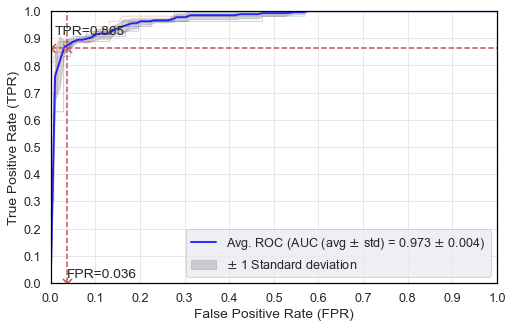


---------------------Average---------------------
AUC (Avg. +/- Std.) is  0.973 +/- 0.004
Accuracy (Avg. +/- Std.) is  0.936 +/- 0.008
Avg. CM is [[46, 5], [7, 132]]
Total for all folds CM is [[230, 25], [36, 660]]
Sensitivity (Avg. +/- Std.) is  0.865 +/- 0.021
Specificity (Avg. +/- Std.) is  0.964 +/- 0.005
Precision (Avg. +/- Std.) is  0.902 +/- 0.011
FOR (Avg. +/- Std.) is  0.052 +/- 0.008
DOR (Avg. +/- Std.) is  176.657 +/- 36.027
{'colsample_bytree': 0.8, 'gamma': 0.5, 'max_depth': 5, 'min_child_weight': 1, 'subsample': 1.0}


In [69]:
Accuracy = []                                                                # for store the value of accuracy 
FP = []                                                                      # for store False Positive 
TN = []                                                                      # for True Negative
FN = []                                                                      # for False Negative
TP = []                                                                      # for True Positive
tprs = []                                                                    # for true positive rates
aucs_xboost = []                                                                # for store the values of auc
sn = []                                                                      # for sensitivity 
sp = []                                                                      # for specificity
pr = []                                                                      # for precision
FOR = []                                                                     # for False omission rate 
DOR = []                                                                     # for Diagnostic odds ratio (DOR)
iterator=0
mean_fpr = np.linspace(0, 1, 100)
fig = plt.figure(figsize=(8, 5))


for train_index, test_index in kf.split(X_Data,Y_Lavel):                     # split into train and test
#   print("TRAIN:", train_index, "TEST:", test_index)
    X_Train, X_Test = X_Data[train_index], X_Data[test_index]                #train data and label
    Y_Train, Y_Test = Y_Lavel[train_index], Y_Lavel[test_index]              #test data and label

    #####################################
    ## define the parameters 
    ######################################
    tuned_parameters = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.5, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

    clf = creat_Model (classifier = xgb.XGBClassifier(objective = "binary:logistic", eval_metric = 'error', random_state=random_initializer),
                      X_Train = X_Train,                                        # create model using XGB classifier 
                      Y_Train = Y_Train,
                      tuned_parameters = tuned_parameters,
                      verbose=0)
    tn, fp, fn, tp, roc_auc, fpr, tpr = metrics (y_true = Y_Test,               #evaluate the model parameters
                                                y_pred = clf.predict(X_Test),
                                                probas_ = clf.predict_proba(X_Test))
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    aucs_xboost.append(roc_auc)
    plot_Current_ROC(fpr,tpr,iterator,roc_auc)                                  #plot the roc of current fold 
    iterator += 1
    TN.append(tn)
    FP.append(fp)
    FN.append(fn)
    TP.append(tp)
    Accuracy.append(accuracy_score(Y_Test, clf.predict(X_Test)))
    sn.append(tp/(tp+fn))
    sp.append(tn/(fp+tn))
    pr.append(tp/(tp+fp))
    FOR.append(fn/(tn+fn))
    DOR.append((tp*tn)/(fp*fn))

average_ROC(mean_fpr,tprs,aucs_xboost,TP,TN,FP,FN)                              #plot average roc curve
average_performance(aucs_xboost,Accuracy,TP,TN,FP,FN)                           #print the average performance of the model

#####################################################################
#    print the sensitivity,specificity,precision,for,dor of model
#####################################################################
print("Sensitivity (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(sn),np.std(sn)))
print("Specificity (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(sp),np.std(sp)))
print("Precision (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(pr),np.std(pr)))
print("FOR (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(FOR),np.std(FOR)))
print("DOR (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(DOR),np.std(DOR)))
print(clf.best_params_)

### Results of all classifiers

In [70]:
algs=['k-nn','dt','rf','ab','nb','xb']
print(algs)
print(all_clf_res)
print(all_clf_res[0]+'-'*5+all_clf_res[1]+'-'*3+all_clf_res[2]+'-'*3+all_clf_res[3]+'-'*8+all_clf_res[4]+'-'*9+all_clf_res[5])

['k-nn', 'dt', 'rf', 'ab', 'nb', 'xb']
['0.953+/-0.013', '0.921+/-0.02', '0.973+/-0.006', '0.927+/-0.018', '0.881+/-0.027', '0.973+/-0.004']
0.953+/-0.013-----0.921+/-0.02---0.973+/-0.006---0.927+/-0.018--------0.881+/-0.027---------0.973+/-0.004
